![](https://images.indiatvnews.com/crimecrime/orld_s_cities_1993.jpg)




#  This kernel sets out to answer following questions all with scraping and extracting data from internet. (In other words without pre-existing, pretty formated datasets):

#  1. How can the crime rate of a country be measured?
#  2. Which countries have the highest/lowest crime rates? 
# 3.Are there typical characteristics of countries with high/low crime rates? 
#  4. Are there countries that have different types of crimes that are dominant? 
# 5. Are there also country characteristics that predict trends in crime rates or types of crimes?

 <a id="top"></a> <br>
## Notebook  Content
*  [Introduction/  1.How can the crime rate of a country be measured?](#1)
*  [Analysis of USA first](#2)
1. [Crime data (loading and pre-processing is a bit lentghy)](#3)
1. [2. Which countries have the highest/lowest crime rates? ](#4)
1. [4. Are there countries that have different types of crimes that are dominant? ](#5)
1. [3.Are there typical characteristics of countries with high/low crime rates? ](#6)
1. [5. Are there also country characteristics that predict trends in crime rates or types of crimes?](#7)


<a id="1"></a> <br>
# 1. How can the crime rate of a country be measured?


Starting of with the first question we can use the official definiton of FBI which classifies homicide, rape, robbery and assault  as violent crime and the true criminality of a country wont be skeewed by non-relevant crimes (if such thing exists). Ofcourse some other categories can come into the story, but I think these should be the main aspect. Same metrics that apply for the countries of the world apply for US States (the first analysis) BUT when we collected these measuraments for the countries of the world a strange pattern emerged: Sweden, German etc were on top of the list. And to quote myself as I said (underneath when second question was answered)

"WHAT? It does not make any sence. Sweden? It is because people have more trust, less corruption, better reporting system punishments etc... IN ORDER To mitigate this effect and get the TRUE levels we ought to normalise these values with all of the values/data that I just named, and even more since these are just some of the factors that influence the odd results. That implies finding ALL of these datasets that coincide with ALL of the countries on ALL of the years. "

So we searched for some indicators that could remove this effect and we found "Rule of law" and "Corruption index" (its underneath when reading in the crime data for the entire world). And we did find that this approach paints a better picture of a crime rate of  a country. (As we shall see later on)


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warnings (as always)


import plotly.figure_factory as ff
import plotly.offline as py
##for online plotting use import plotly.plotly as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import gc
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score

First of all we are going to do some **introductory analysis** that should serve as an baby example for the actual one. **Crime Analysis of US States** (with some small Analysis of NYC). Datasets for USA is usually excellant and we did not have to wrestle with it just find a way to answer the questions. If one whishes to skip analysis of USA than scroll down over to 
### Crime Data

<a id="2"></a> <br>
# US States Analysis


Now let us load an US data set containing 4 types of violent crime in major US cities (cities with over 250 000 citizens). This should serve as a templete to an (almost) perfect data set that we need to find. We have 40 years of data, there are 4 types of different crimes reported all through out the year. Further more we have clearly distinct areas with additional number of population for each area.

In [2]:
df2 = pd.read_csv("../input/crime-rates/report.csv", encoding='latin1')
df2

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


Now us do some EDA to get to know our complete data set

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0,0.5,'City and state'), Text(0.5,0,'Total number of crimes')]

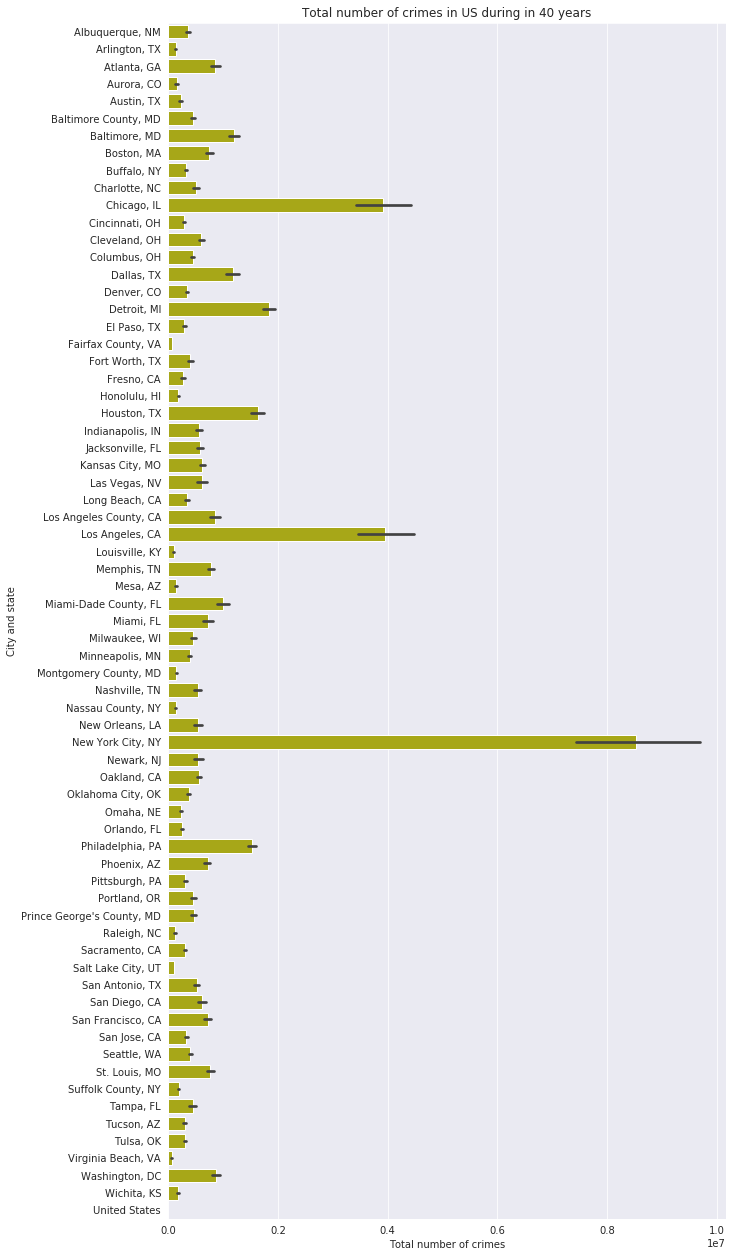

In [3]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot(df2["violent_crimes"]+df2["homicides"]+
                 df2["rapes"]+df2["assaults"]+df2["robberies"],                 
                 y=df2["agency_jurisdiction"],estimator=sum,color="y")
ax.set_title('Total number of crimes in US during in 40 years')
ax.set(xlabel='Total number of crimes', ylabel='City and state')

There are a couple of things that are interesting here. First of all city "United States" is the sum of them all. Further more New York, LA, Chicago seem to be most violent, or is it because of the shere number of citizens in these towns? How can we investigate it? Let us creeate a new variable that is relative to the number of citizens, i.e. total number of crime divided with total citizens. (NOTE: Black line is simply confidence interval of estimation)

# Main metric that we are trying to predict:

In [4]:

df2["relative_crime"]=(df2["violent_crimes"]+df2["homicides"]+
                 df2["rapes"]+df2["assaults"]+df2["robberies"])/df2.population



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0,0.5,'City and state'), Text(0.5,0,'Total number of crimes')]

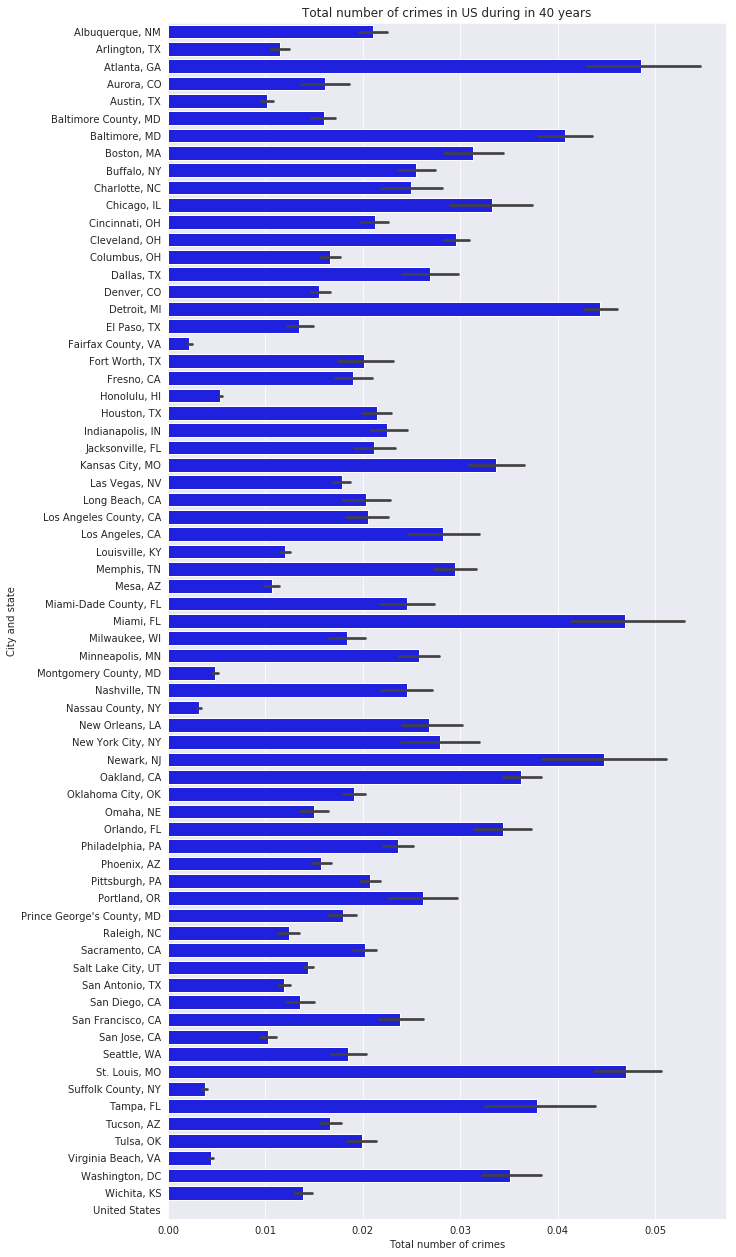

In [5]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot(x=df2["relative_crime"],y=df2["agency_jurisdiction"],color="b")
ax.set_title('Total number of crimes in US during in 40 years')
ax.set(xlabel='Total number of crimes', ylabel='City and state')

That paints another picture, now top of the list is St.Louis, Atlanta, Miami etc. That was interesting, but was it always like that? What was the number of crimes over the years?

In [6]:
i = df2[(df2.agency_jurisdiction == "United States")].index
df2.drop(i,inplace=True)


In [7]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

a = set(df2["agency_jurisdiction"])
a = list(a)

doubles = dict()
for i in range(0,len(a)):
    doubles[i] = df2[df2['agency_jurisdiction'].str.contains(a[i])]

trace = dict()
for i in range(0,len(a)):
    trace[i] = go.Scatter(x = doubles[i]['report_year'],y=doubles[i]['violent_crimes'],name = a[i],opacity = 0.8)

data = [trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9],
        trace[10],trace[11],trace[12],trace[13],trace[14],trace[15],trace[16],trace[17],trace[18],trace[19],
         trace[20],trace[21],trace[22],trace[23],trace[24],trace[25],trace[26],trace[27],trace[28],trace[29],
          trace[30],trace[31],trace[32],trace[33],trace[34],trace[35],trace[36],trace[37],trace[38],trace[39],
           trace[40],trace[41],trace[42],trace[43],trace[44],trace[45],trace[46],trace[47],trace[48],trace[49],
            trace[50],trace[51],trace[52],trace[53],trace[54],trace[55],trace[56],trace[57],trace[58],trace[59],
             trace[60],trace[61],trace[62],trace[63],trace[64],trace[65],trace[66],trace[67]]

layout = dict(title = "Total Crimes in US during in 40 years",
              xaxis = dict(title = 'Time Span'),
              yaxis = dict(title = 'Cumulative crimes'),)

fig = dict(data=data, layout=layout)
py.iplot(fig)

Now from here we can set a lot of interesting question. One of them would be why was crime in NYC in 90-s so high? Well there seems to be a couple of factors (we state them, not test them) For example, the police force in New York City grew by 35 percent in the 1990s, the numbers of prison inmates rose 24 percent, and there were demographic changes, including a decline in the number of youths. The national unemployment rate declined 25 percent between 1990 and 1999, and by 39 percent in the city between 1992 and 1999. This study shows that a single percentage point decline in the jobless rate decreases burglary by 2.2 percent and motor vehicle theft by 1.8 percent. Increases in the real minimum wage also significantly reduce robberies and murders: 3.4 to 3.7 percent fewer robberies with a 10 percent increase in the minimum wage and 6.3 to 6.9 percent fewer murders. And ofcourse police measures.The police measure that most consistently reduces crime is the arrest rate of those involved in crime, the study finds. Felony arrest rates (except for motor vehicle thefts) rose 50 to 70 percent in the 1990s. When arrests of burglars increased 10 percent, the number of burglaries fell 2.7 to 3.2 percent. When the arrest rate of robbers rose 10 percent, the number of robberies fell 5.7 to 5.9 percent. In the case of murder, the decline was 3.9 to 4 percent; in the case of assault, 2 to 2.4 percent; and for motor vehicle theft, 5 to 5.1 percent. Could a mayor have helped in reducing crime?

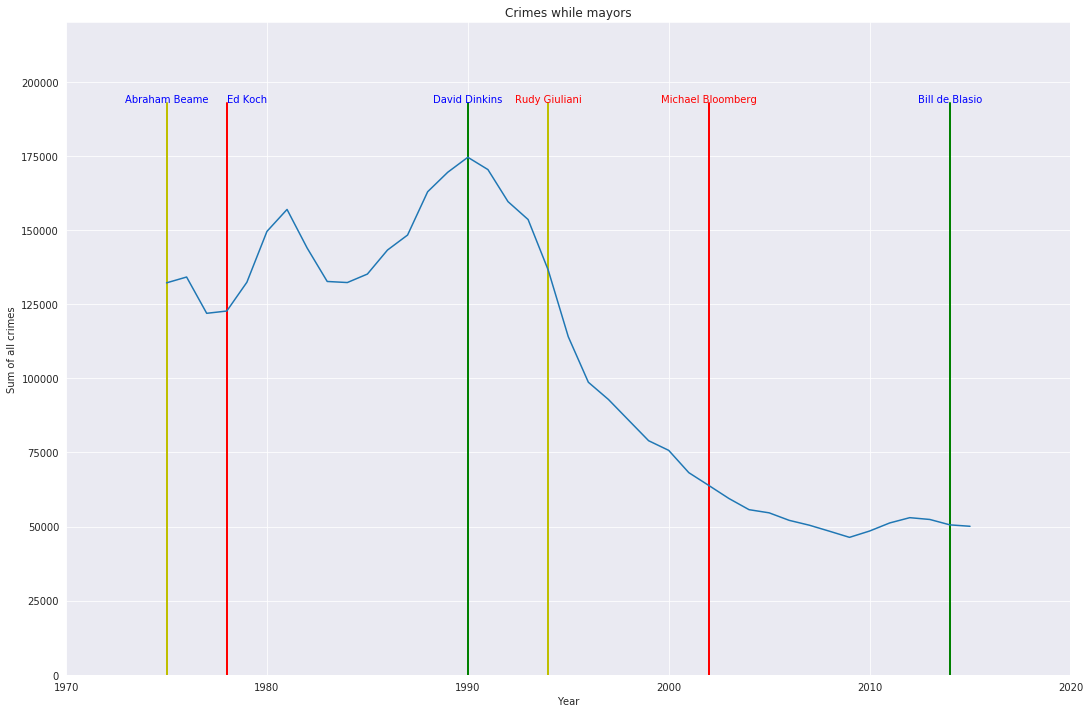

In [8]:
NYC = df2[df2.agency_jurisdiction == 'New York City, NY']

ax=plt.figure(5,figsize=(18,12))
ax = plt.plot([1975, 1975], [0, 193000], 'y-', lw=2)
ax = plt.text(1975, 193000, 'Abraham Beame',color='blue',horizontalalignment='center')
ax = plt.plot([1978, 1978], [0, 193000], 'r-', lw=2)
ax = plt.text(1978, 193000, 'Ed Koch',color='blue',horizontalalignment='left')
ax = plt.plot([1990, 1990], [0, 193000], 'g-', lw=2)
ax = plt.text(1990, 193000, 'David Dinkins',color='blue',horizontalalignment='center')
ax = plt.plot([1994, 1994], [0, 193000], 'y-', lw=2)
ax = plt.text(1994, 193000, 'Rudy Giuliani',color='red',horizontalalignment='center')
ax = plt.plot([2002, 2002], [0, 193000], 'r-', lw=2)
ax = plt.text(2002, 193000, 'Michael Bloomberg',color='red',horizontalalignment='center')
ax = plt.plot([2014, 2014], [0, 193000], 'g-', lw=2)
ax = plt.text(2014, 193000, 'Bill de Blasio',color='blue',horizontalalignment='center')
ax = plt.plot(NYC["report_year"],NYC["violent_crimes"])
plt.title('Crimes while mayors')
plt.xlabel("Year")
plt.ylabel("Sum of all crimes")
plt.ylim([0,220000])
plt.xlim([1970,2020])
plt.show()

Let us now jumpt to conculusions, correlation is not causation but David Dinkins must have helped. New York city seems interesting since on the absolute scale it has the most crime in the entire United States. Let us dig deeper in NYC.

Text(0,0.5,'Number of Homicides')

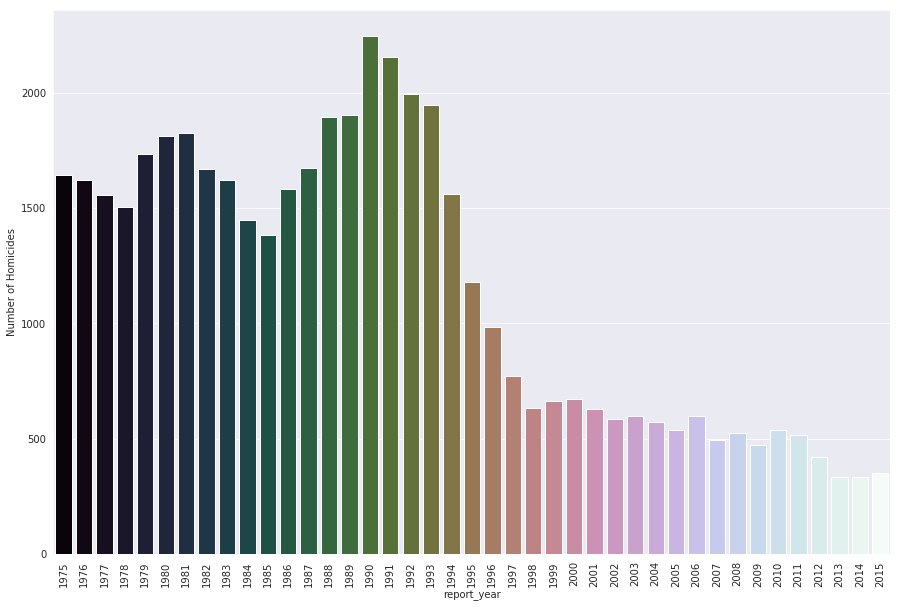

In [9]:

ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(NYC["report_year"], NYC["homicides"],palette="cubehelix")

plt.ylabel("Number of Homicides")

Text(0,0.5,'Number of Rapes')

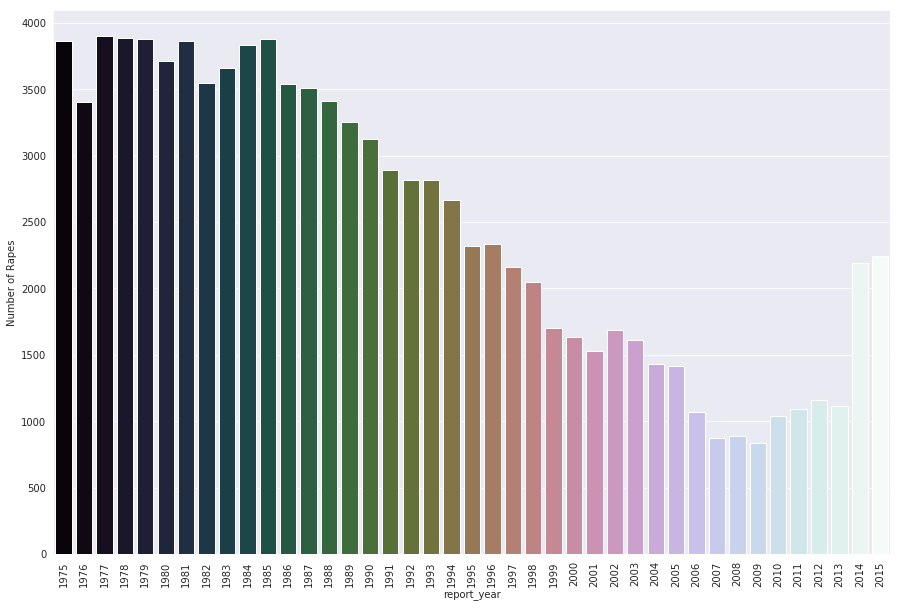

In [10]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.barplot(NYC["report_year"], NYC["rapes"],palette="cubehelix")
plt.ylabel("Number of Rapes")

Text(0,0.5,'Number of Assaults')

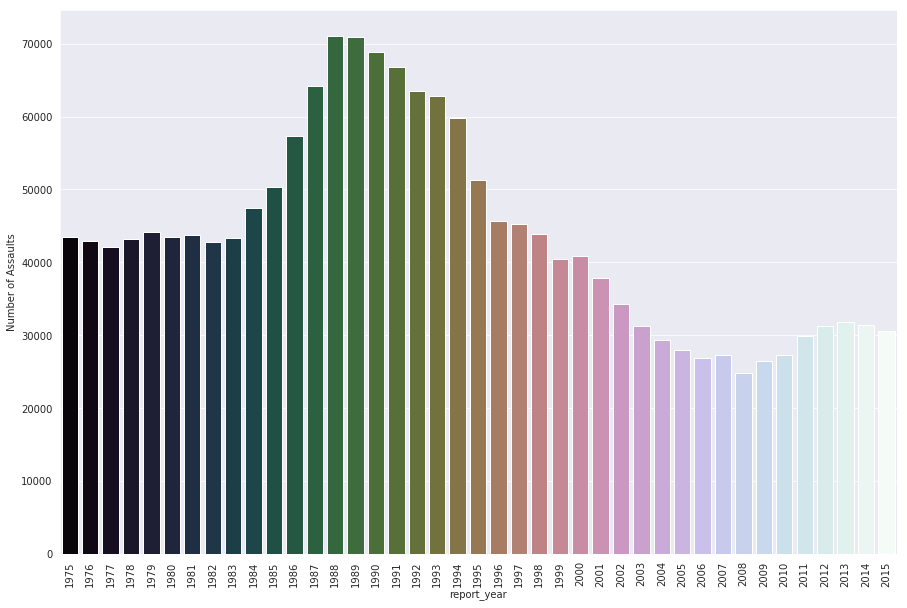

In [11]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.barplot(NYC["report_year"], NYC["assaults"],palette="cubehelix")
plt.ylabel("Number of Assaults")

Text(0,0.5,'Number of Robberies')

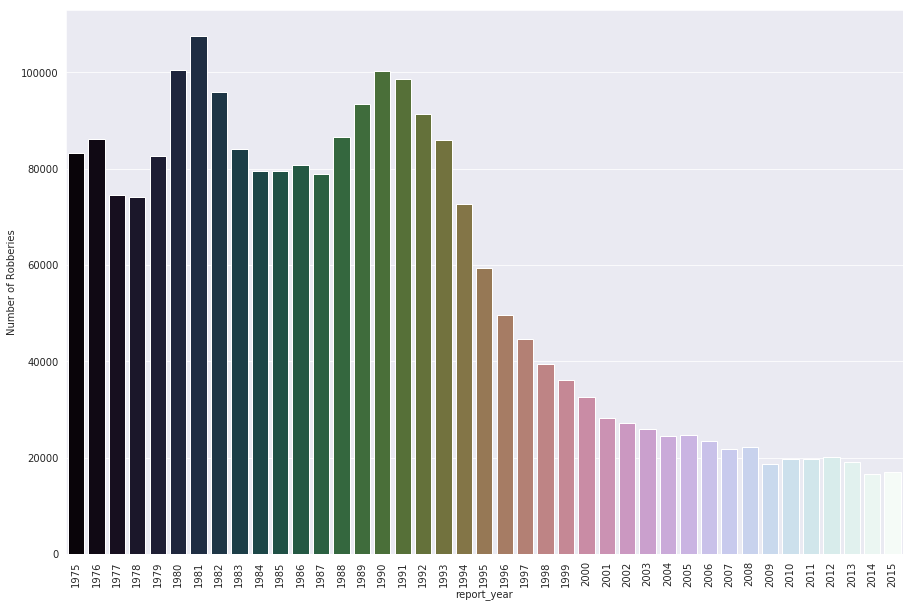

In [12]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.barplot(NYC["report_year"], NYC["robberies"],palette="cubehelix")
plt.ylabel("Number of Robberies")

We have analyzed NYC enough, let us now try to find some socio-economic data, and try to see if we can use it to predict crime rate all around US. But how do we quantify successful state? NY state is quite successful at the first glance, but it is at the top of our list for crime. A couple that we should look for and that are at the top of my mind are: Unemployment Rate,Worker Productivity,Startup Activity,Median Household Income,Upward Mobility Rates,Road Quality,Public Utility Fee Rates,Overall Tax Burden  etc etc... I managed to dig up 2 interesting datasets. First if US unemplyment by county and state from 1990 until 2016 and Zillow Rent Index from 2010 until 2017. Hypothesis is simple, where there was a lot of unemplyment and biggest living factor (rent) was high ->>> more crime. Let us test that. But before we do that, we need to merge the datasets together.

In [13]:
df3 = pd.read_csv("../input/unemployment-by-county-us/output.csv", encoding='latin1')
df3.head()
df3['County']=df3['County'].astype(str).str.split().str[0]
df3['County']

0               Newton
1               Panola
2               Monroe
3                Hinds
4               Kemper
5              Calhoun
6               Clarke
7            Jefferson
8              Madison
9              Sharkey
10              Tunica
11                Tate
12           Lafayette
13             Bolivar
14               Stone
15             Noxubee
16               Lamar
17                 Lee
18              Desoto
19               Adams
20            Pontotoc
21              Marion
22              Jasper
23             Simpson
24           Sunflower
25             Hancock
26             Winston
27             Carroll
28              Copiah
29           Jefferson
              ...     
885518            Elko
885519         Lincoln
885520          Eureka
885521          Lander
885522         Mineral
885523         Douglas
885524       Esmeralda
885525          Washoe
885526          Storey
885527            Lyon
885528       Churchill
885529           White
885530     

In [14]:
df3.rename(columns={'Rate':'Unemployment rate'}, inplace=True)

In [15]:
df3.head()

,Year,Month,State,County,Unemployment rate
0,2015,February,Mississippi,Newton,6.1
1,2015,February,Mississippi,Panola,9.4
2,2015,February,Mississippi,Monroe,7.9
3,2015,February,Mississippi,Hinds,6.1
4,2015,February,Mississippi,Kemper,10.6


WE have from 2009 until 2015 unemployment rates.

In [16]:
df3.isna().sum().sum()

0

In [17]:
df4 = pd.read_csv("../input/rent-index/price.csv", encoding='latin1')
df4.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,...,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,...,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,...,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,...,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,...,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,...,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


In [18]:
df4.describe()

,City Code,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,September 2013,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
count,13131.000000,13131.000000,11348.000000,11348.000000,11348.000000,11500.000000,11673.000000,11722.000000,11732.000000,11732.000000,11732.000000,11732.000000,11734.000000,11748.000000,11748.000000,11969.000000,11969.000000,11969.000000,11969.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000,13131.000000
mean,78126.756454,6566.000000,1327.100458,1331.831953,1334.447744,1331.935217,1327.595819,1323.824518,1321.730822,1321.872826,1321.701500,1320.276509,1317.809017,1314.430967,1313.607167,1335.346980,1334.044782,1334.474810,1336.482329,1321.113700,1322.932907,1323.985607,1324.170436,1323.780367,1323.750362,1325.199452,1328.291295,1330.215901,1332.096261,1333.685706,1335.086741,1337.224050,1340.274313,1344.064580,1347.076765,1349.565303,1352.530424,1357.197395,1363.411698,1366.520219,1366.900617,1365.858122,1364.428223,1363.086437,1360.323890,1357.381311,1359.445358,1367.004493,1379.142868,1389.080344,1398.114995,1403.956134,1408.504303,1412.642601,1417.458762,1423.850050,1430.873505,1438.335999,1445.181631,1449.679842,1450.068692,1447.928414,1446.270429,1445.522352,1449.748610,1454.748458,1461.879369,1466.406519,1470.625695,1472.876856,1471.627370,1468.666667,1465.817988,1465.572157,1467.105247,1467.524636,1467.296550
std,119604.910806,3790.737527,652.531343,655.822002,653.931315,647.853483,640.168818,636.392831,633.675563,631.981504,629.807342,628.195725,627.508137,628.712519,632.662096,676.779082,678.139389,677.814656,677.752485,655.406925,657.231796,659.466388,661.127471,661.464267,661.028177,660.306994,660.499807,661.187255,665.068546,670.590684,676.074551,680.038497,682.225208,683.995681,684.796885,685.594113,685.886357,687.080224,689.765076,692.336807,695.633285,698.292800,701.275956,704.393678,707.085257,708.811348,712.627379,718.481079,727.093895,733.433308,738.943191,741.983344,745.462835,749.500600,756.810334,764.869552,772.643599,778.952948,784.584029,789.324249,794.062348,799.886326,806.151092,810.949823,814.538438,814.494340,813.984135,813.253498,815.322324,819.417181,823.317848,825.885842,826.421670,825.621199,824.678612,821.891626,820.707579
min,3300.000000,1.000000,547.000000,539.000000,536.000000,542.000000,535.000000,533.000000,533.000000,536.000000,539.000000,542.000000,531.000000,516.000000,498.000000,485.000000,471.000000,470.000000,479.000000,490.000000,495.000000,496.000000,496.000000,499.0000

In [19]:
years = list(set([y.split( )[1] for y in df4.columns[6:]]))
months = df4.columns[6:]

Lets have a look at rent at New Jersey and NYC, monthly! Before that we had to split the months from the dataframe

In [20]:
nyc_rent = df4[df4["Metro"]=="New York"]
ny_njer_rent = df4.groupby("State")[months].median()


In [21]:
trace1 = go.Scatter(x = months, 
                  y= np.nanmedian(nyc_rent[nyc_rent["State"]=="NY"][months], axis = 0),
                    mode='markers', marker=dict(size=5,color = ('aqua')), 
                   name = "New York")
trace2 = go.Scatter(x = months, 
                  y= np.nanmedian(nyc_rent[nyc_rent["State"]=="NJ"][months], axis = 0),
                    mode='markers', marker=dict(size=5,color = ('navy')),
                   name = "New Jersey")



fig = tools.make_subplots(rows= 1 , cols=2, subplot_titles=('Median NY Rent','Median NJ Rent'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)

fig['layout'].update(showlegend=False, title='Median Rent Price of New York VS New Jersey')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [22]:
df4.isna().sum().sum()

25486

We have to analyse and deal with there missing values. First of all let us consult dataset description, maybe there something there to be found. According to the documentation time series goes back to november 2010 but nor for every city/county/state. (Obviously) So we are left with no hints on how to handle the NaN. MICE/ using other columns as indicators to imputate missing values makes really no sense since these are rising time series, on monthly basis.  Sinc

Only rows that have missing values:

In [23]:
df4[df4.isnull().any(axis=1)].head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,...,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,...,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
27,5976,Milwaukee,Milwaukee,Milwaukee,WI,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875,880,893,907,917,925,931,939,934,930,930,936,945,954,955,955,951,...,963,974,971,965,954,938,924,909,900,898,903,916,928,938,941,946,952,959,965,971,972,969,963,959,959,961,959,968,980,996,1003,1007,1007,1008,1007,1003,999,999,1001,1006
32,23429,Albuquerque,Albuquerque,Bernalillo,NM,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166,1150,1141,1128,1121,1120,1128,1128,1127,1121,1118,1119,1121,1125,1131,1139,1146,...,1157,1157,1160,1164,1166,1165,1161,1158,1155,1157,1162,1170,1175,1173,1178,1181,1188,1191,1194,1200,1205,1209,1206,1201,1194,1190,1192,1197,1197,1200,1201,1206,1206,1206,1204,1202,1198,1193,1193,1197
47,44055,Baton Rouge,Baton Rouge,East Baton Rouge,LA,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1172,1166,1167,1170,1170,1169,1172,1182,1191,1203,1219,1224,1219,1207,1194,1190,1194,...,1212,1211,1206,1196,1183,1175,1185,1208,1229,1251,1281,1304,1312,1308,1300,1297,1314,1329,1334,1332,1320,1313,1305,1300,1297,1290,1290,1286,1299,1300,1299,1298,1293,1284,1268,1251,1243,1251,1279,1306
48,19594,New Orleans,New Orleans,Orleans,LA,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1218,1201,1197,1193,1188,1184,1199,1226,1252,1257,1264,1277,1303,1327,1342,1329,1305,...,1249,1237,1234,1236,1248,1264,1280,1294,1297,1335,1385,1430,1451,1471,1498,1542,1582,1591,1570,1550,1548,1555,1573,1596,1603,1576,1533,1500,1484,1479,1483,1495,1500,1481,1447,1411,1396,1397,1403,1404


But where are these missing values mostly missing?

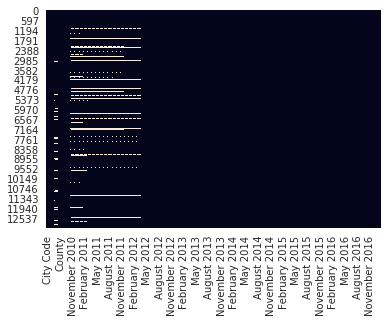

In [24]:
sns.heatmap(df4.isnull(), cbar=False)

It seems that all of the missing values are mostly just in the first year. Interpolation is hard because we need values from both sides, and NaN start right from the start. WE could imputate with mean but we reduce the volatility of the data set. Another thing to do here is to cut the first year (so we are starting with November 2011) and for the rest just use backfill. This approach is bad, since we are only throwing less then 1/6 (still a considerable amount of data!).
### Solution: Just use linear regression since the values do follow it

In [25]:
df4.interpolate(method='piecewise_polynomial', inplace=True, limit_direction="both")

In [26]:
df4

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,...,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1746.0,1752.0,1764.0,1778.0,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,...,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,2189.0,2189.0,2188.0,2191.0,2189.0,2186.0,2183.0,2183.0,2182.0,2178.0,2172.0,2175.0,2177.0,2183,2186,2190,2192,2189,2189,2185,2183,2186,2194,2203,2212,2222,2229,2236,2239,2246,...,2267,2278,2283,2285,2283,2285,2283,2285,2288,2303,2320,2343,2367,2395,2423,2445,2464,2479,2493,2502,2511,2521,2536,2546,2555,2564,2577,2596,2607,2622,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,1526.0,1517.0,1507.0,1497.0,1493.0,1491.0,1489.0,1485.0,1480.0,1483.0,1484.0,1485.0,1489.0,1494,1496,1493,1491,1491,1498,1509,1513,1517,1514,1511,1512,1527,1544,1560,1562,1568,...,1584,1585,1593,1606,1616,1619,1614,1612,1615,1628,1636,1649,1658,1672,1677,1677,1668,1668,1669,1667,1668,1670,1668,1660,1652,1649,1653,1668,1671,1682,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,1203.0,1205.0,1204.0,1199.0,1194.0,1190.0,1188.0,1186.0,1188.0,1190.0,1194.0,1196.0,1199.0,1200,1199,1197,1193,1193,1197,1201,1203,1199,1201,1208,1218,1227,1236,1248,1258,1265,...,1277,1287,1295,1297,1296,1293,1294,1296,1301,1310,1322,1334,1344,1355,1367,1377,1384,1389,1394,1402,1410,1419,1425,1428,1428,1429,1431,1436,1439,1442,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,1080.0,1080.0,1083.0,1082.0,1082.0,1085.0,1095.0,1098.0,1094.0,1085.0,1080.0,1083.0,1087.0,1091,1092,1094,1096,1095,1092,1090,1089,1087,1083,1081,1083,1089,1093,1095,1094,1093,...,1083,1082,1085,1092,1098,1105,1108,1108,1106,1111,1121,1136,1150,1164,1175,1182,1185,1183,1178,1176,1179,1179,1177,1175,1179,1184,1189,1196,1200,1205,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,1065.0,1063.0,1059.0,1057.0,1056.0,1055.0,1050.0,1042.0,1033.0,1029.0,1029.0,1029.0,1032.0,1034,1038,1041,1043,1048,1053,1059,1066,1073,1078,1079,1079,1080,1083,1087,1087,1088,...,1096,1099,1104,1107,1107,1103,1099,1096,1095,1099,1103,1112,1122,1132,1140,1146,1152,1159,1164,1171,1176,1185,1191,1194,1193,1191,1193,1198,1206,1218,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247
6,18959,Las Vegas,Las Vegas,Clark,NV,7,1188.0,1183.0,1178.0,1177.0,1178.0,1179.0,1176.0,1170.0,1163.0,1158.0,1154.0,1149.0,1144.0,1140.0,1137.0,1133.0,1130.0,1127,1127,1127,1128,1126,1125,1124,1125,1126,1128,1130,1131,1131,1132,1134,1138,1141,...,1148,1152,1155,1157,1158,1157,1157,1155,1155,1155,1158,1162,1168,1172,1176,1175,1175,1174,1176,1180,1186,1192,1197,1197,1197,1196,1198,1204,1

In [27]:
df4.isna().sum().sum()

1245

It seems that we missed a spot, it is because of the piecewise polynomial method. No problem, for the rest 1245 Values (not rows!) we can use linear regression, since (looking at the graphs polynomials seem more reasonable but linear regression is not far from truth!)

In [28]:
df4.interpolate(method='linear', inplace=True, limit_direction="both")

In [29]:
df4.drop(["Metro"], axis=1,inplace=True)

In [30]:
df4.isna().sum().sum()

0

**df2-Data frame**, dataset of crimes for the entire US, including the desired column "relative_crime" also has some NaN, let us inspect whats wrong

In [31]:
df2.isna().sum().sum()

503

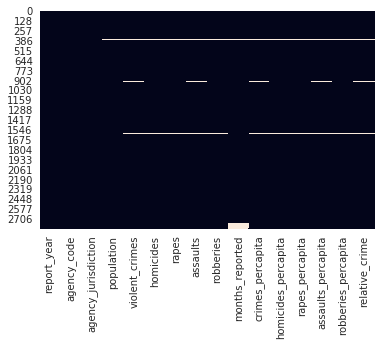

In [32]:
sns.heatmap(df2.isnull(), cbar=False)

How to interpret this heatmap? y-axis are indices (in this case nubmers) Because of the shere number of them we can only approximately find them, but atleast we see what are the troubling columns.

In [33]:
df2=df2[df2["report_year"]>2009]

In [34]:
df2.drop(["months_reported","agency_code"], axis=1,inplace=True)

In [35]:
df2[df2.isnull().any(axis=1)]

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,relative_crime
2765,2015,"Baltimore County, MD",828871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2772,2015,"Cleveland, OH",388655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2810,2015,"Portland, OR",615672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now here we can clearly see that the missing values are (mostly!) just missing yearly measures. Since we already know that we only have 2010 values for rent across the whole USA, than thats what we are going to be looking at here, hence only 74 rows with (atleast one) missing value. Effectively we only have 3 rows that have missing values. Let us just drop them.

In [36]:
df2.dropna(inplace=True)

In [37]:
df2.isna().sum().sum()

0

Now that we cleaned our datasets we can merge them. But before that we ought to split the "agency_jurisdiction" into two columns containing counties.

In [38]:
df2.head()

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,relative_crime
2415,2010,"Albuquerque, NM",545852.0,4291.0,42.0,338.0,2971.0,940.0,786.11,7.69,61.92,544.29,172.21,0.015722
2416,2010,"Arlington, TX",365438.0,1925.0,16.0,119.0,1258.0,532.0,526.77,4.38,32.56,344.24,145.58,0.010535
2417,2010,"Atlanta, GA",420003.0,5749.0,93.0,89.0,3405.0,2162.0,1368.80,22.14,21.19,810.71,514.76,0.027376
2418,2010,"Aurora, CO",325078.0,1449.0,24.0,181.0,737.0,507.0,445.74,7.38,55.68,226.71,155.96,0.008915
2419,2010,"Austin, TX",790390.0,3790.0,38.0,265.0,2256.0,1231.0,479.51,4.81,33.53,285.43,155.75,0.009590


In [39]:
df2[['City',"State"]] = df2["agency_jurisdiction"].str.split(',',expand=True)

In [40]:
df2.drop(["City","agency_jurisdiction"], axis=1,inplace=True)

In [41]:
df2.head()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,relative_crime,State
2415,2010,545852.0,4291.0,42.0,338.0,2971.0,940.0,786.11,7.69,61.92,544.29,172.21,0.015722,NM
2416,2010,365438.0,1925.0,16.0,119.0,1258.0,532.0,526.77,4.38,32.56,344.24,145.58,0.010535,TX
2417,2010,420003.0,5749.0,93.0,89.0,3405.0,2162.0,1368.80,22.14,21.19,810.71,514.76,0.027376,GA
2418,2010,325078.0,1449.0,24.0,181.0,737.0,507.0,445.74,7.38,55.68,226.71,155.96,0.008915,CO
2419,2010,790390.0,3790.0,38.0,265.0,2256.0,1231.0,479.51,4.81,33.53,285.43,155.75,0.009590,TX


df3 is a bit problematic, that is why we are going to need to create another dataframe that is going to help us to have abbreviations for states and not the full names.

In [42]:
d = {'State': ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois", "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania", "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"], 'Abb': ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]}
df_abv = pd.DataFrame(data=d)

In [43]:
df_abv.head()

,State,Abb
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [44]:
df3=df3.merge(df_abv)
df3.drop(["State"], axis=1,inplace=True)

In [45]:
df3.rename(columns={'Abb':'State'}, inplace=True)

In [46]:
df3.head()

,Year,Month,County,Unemployment rate,State
0,2015,February,Newton,6.1,MS
1,2015,February,Panola,9.4,MS
2,2015,February,Monroe,7.9,MS
3,2015,February,Hinds,6.1,MS
4,2015,February,Kemper,10.6,MS


In [47]:
df = df3.merge(df4)
df.drop(["Month","County","City Code","Population Rank","City"], axis=1,inplace=True)
df=df[df["Year"]>2009]


Before merging with df2, the crime dataset, we have to think about memory of the df dataset. There are a lot of rows that we basically wont need. hence we can drop them

In [48]:
df.State = df.State.astype(str)
df2.State = df2.State.astype(str)
df.State=df.State.str.strip()
df2.State=df2.State.str.strip()


For memory issues we will have to make this aggregation, in order to save space. Alternative is this kernel https://www.kaggle.com/o7ronak7/how-to-save-time-and-memory-with-big-datasets

In [49]:
df=df.groupby(["State","Year"]).mean()

In [50]:
df.reset_index(inplace=True)

In [51]:
df.head()

,State,Year,Unemployment rate,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,September 2013,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,AL,2010,10.037016,1007.647674,1006.896512,1006.848062,1009.365116,1009.581783,1008.277519,1006.670543,1006.908915,1007.509302,1006.596899,1004.591473,1003.625969,1004.168217,1012.162403,1015.375194,1020.644961,1028.817054,985.604651,982.832558,973.64186,966.102326,961.595349,958.302326,956.376744,954.874419,955.660465,956.465116,956.325581,955.293023,956.944186,960.6,964.283721,966.87907,967.153488,968.339535,969.539535,971.651163,974.260465,972.851163,969.544186,963.288372,959.981395,959.153488,960.586047,963.832558,970.381395,980.0,989.590698,997.013953,1000.981395,1002.893023,1003.916279,1005.232558,1009.516279,1016.572093,1025.302326,1031.944186,1036.67907,1036.52093,1032.948837,1027.637209,1022.786047,1021.846512,1023.037209,1024.776744,1023.702326,1022.362791,1020.246512,1016.967442,1012.390698,1008.688372,1006.576744,1005.395349,1004.446512,1004.390698
1,AL,2011,9.176628,1007.647674,1006.896512,1006.848062,1009.365116,1009.581783,1008.277519,1006.670543,1006.908915,1007.509302,1006.596899,1004.591473,1003.625969,1004.168217,1012.162403,1015.375194,1020.644961,1028.817054,985.604651,982.832558,973.64186,966.102326,961.595349,958.302326,956.376744,954.874419,955.660465,956.465116,956.325581,955.293023,956.944186,960.6,964.283721,966.87907,967.153488,968.339535,969.539535,971.651163,974.260465,972.851163,969.544186,963.288372,959.981395,959.153488,960.586047,963.832558,970.381395,980.0,989.590698,997.013953,1000.981395,1002.893023,1003.916279,1005.232558,1009.516279,1016.572093,1025.302326,1031.944186,1036.67907,1036.52093,1032.948837,1027.637209,1022.786047,1021.846512,1023.037209,1024.776744,1023.702326,1022.362791,1020.246512,1016.967442,1012.390698,1008.688372,1006.576744,1005.395349,1004.446512,1004.390698
2,AL,2012,7.669302,1007.647674,1006.896512,1006.848062,1009.365116,1009.581783,1008.277519,1006.670543,1006.908915,1007.509302,1006.596899,1004.591473,1003.625969,1004.168217,1012.162403,1015.375194,1020.644961,1028.817054,985.604651,982.832558,973.64186,966.102326,961.595349,958.302326,956.376744,954.874419,955.660465,956.465116,956.325581,955.293023,956.944186,960.6,964.283721,966.87907,967.153488,968.339535,969.539535,971.651163,974.260465,972.851163,969.544186,963.288372,959.981395,959.153488,960.586047,963.832558,970.381395,980.0,989.590698,997.013953,1000.981395,1002.893023,1003.916279,1005.232558,1009.516279,1016.572093,1025.302326,1031.944186,1036.67907,1036.52093,1032.948837,1027.637209,1022.786047,1021.846512,1023.037209,1024.776744,1023.702326,1022.362791,1020.246512,1016.967442,1012.390698,1008.688372,1006.576744,1005.395349,1004.446512,1004.390698
3,AL,2013,6.999612,1007.647674,1006.896512,1006.848062,1009.365116,1009.581783,1008.277519,1006.670543,1006.908915,1007.509302,1006.596899,1004.591473,1003.625969,1004.168217,1012.162403,1015.375194,1020.644961,1028.817054,985.604651,982.832558,973.64186,966.102326,961.595349,958.302326,956.376744,954.874419,955.660465,956.465116,956.325581,955.293023,956.944186,960.6,964.283721,966.87907,967.153488,968.339535,969.539535,971.6511

In [52]:
final_df=df2.merge(df)


In [53]:
del df2,df3,df4,df
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [54]:
X_train_set_df=final_df[final_df["Year"]<2015].drop(["State","report_year","Year"], axis=1)
Y_train_set_df=final_df[final_df["Year"]<2015].drop(['report_year', 'population', 'violent_crimes', 'homicides', 'rapes',
       'assaults', 'robberies', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita',
       'State', 'Year', 'Unemployment rate', 'November 2010',
       'December 2010', 'January 2011', 'February 2011', 'March 2011',
       'April 2011', 'May 2011', 'June 2011', 'July 2011', 'August 2011',
       'September 2011', 'October 2011', 'November 2011', 'December 2011',
       'January 2012', 'February 2012', 'March 2012', 'April 2012', 'May 2012',
       'June 2012', 'July 2012', 'August 2012', 'September 2012',
       'October 2012', 'November 2012', 'December 2012', 'January 2013',
       'February 2013', 'March 2013', 'April 2013', 'May 2013', 'June 2013',
       'July 2013', 'August 2013', 'September 2013', 'October 2013',
       'November 2013', 'December 2013', 'January 2014', 'February 2014',
       'March 2014', 'April 2014', 'May 2014', 'June 2014', 'July 2014',
       'August 2014', 'September 2014', 'October 2014', 'November 2014',
       'December 2014', 'January 2015', 'February 2015', 'March 2015',
       'April 2015', 'May 2015', 'June 2015', 'July 2015', 'August 2015',
       'September 2015', 'October 2015', 'November 2015', 'December 2015',
       'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016',
       'June 2016', 'July 2016', 'August 2016', 'September 2016',
       'October 2016', 'November 2016', 'December 2016', 'January 2017'], axis=1)

In [55]:
X_test_set_df=final_df[final_df["Year"]>2014].drop(["State","report_year","Year"], axis=1)
Y_test_set_df=final_df[final_df["Year"]>2014].drop(['report_year', 'population', 'violent_crimes', 'homicides', 'rapes',
       'assaults', 'robberies', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita',
       'State', 'Year', 'Unemployment rate', 'November 2010',
       'December 2010', 'January 2011', 'February 2011', 'March 2011',
       'April 2011', 'May 2011', 'June 2011', 'July 2011', 'August 2011',
       'September 2011', 'October 2011', 'November 2011', 'December 2011',
       'January 2012', 'February 2012', 'March 2012', 'April 2012', 'May 2012',
       'June 2012', 'July 2012', 'August 2012', 'September 2012',
       'October 2012', 'November 2012', 'December 2012', 'January 2013',
       'February 2013', 'March 2013', 'April 2013', 'May 2013', 'June 2013',
       'July 2013', 'August 2013', 'September 2013', 'October 2013',
       'November 2013', 'December 2013', 'January 2014', 'February 2014',
       'March 2014', 'April 2014', 'May 2014', 'June 2014', 'July 2014',
       'August 2014', 'September 2014', 'October 2014', 'November 2014',
       'December 2014', 'January 2015', 'February 2015', 'March 2015',
       'April 2015', 'May 2015', 'June 2015', 'July 2015', 'August 2015',
       'September 2015', 'October 2015', 'November 2015', 'December 2015',
       'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016',
       'June 2016', 'July 2016', 'August 2016', 'September 2016',
       'October 2016', 'November 2016', 'December 2016', 'January 2017'], axis=1)

Modelling: Elastic Net (in essence regression with penalization term) regression

In [56]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [57]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train_set_df, Y_train_set_df)
train_test(ENSTest, X_train_set_df, X_test_set_df, Y_train_set_df, Y_test_set_df)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9999985245023364
RMSE: 1.0442007498646799e-05
Test
R2: 0.9999985245023364
RMSE: 1.044200749864681e-05


That was a small taste of what an analysis should look like on a US states. For a larger scale analysis first we have to gather/scrape data from verious sources.

We need to find datasets of Crime, Socio and Economic factors of different countries expanding over a large time horizont.

<a id="3"></a> <br>
# Crime Data

In [58]:
df = pd.read_csv('../input/crimes-un-datacsv/Crimes_UN_data.csv', skiprows=[0], encoding='latin1')
df.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2015,"Intentional homicide rates per 100,000",5.3,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
1,202,Sub-Saharan Africa,2015,"Intentional homicide rates per 100,000",9.6,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
2,419,Latin America & the Caribbean,2015,"Intentional homicide rates per 100,000",22.3,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
3,62,South-central Asia,2015,"Intentional homicide rates per 100,000",3.7,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...
4,53,Australia and New Zealand,2015,"Intentional homicide rates per 100,000",1,"Data is for 2015, or latest available data fro...",United Nations Office on Drugs and Crime (UNOD...


Very ugly data frame, let us try to clean it up and keep only the desired columns

In [59]:
cols = list(df.columns)
cols[1] = 'Region'
df.columns = cols
pivoted = pd.pivot_table(df, values='Value', index=['Region', 'Year'], columns='Series', aggfunc=sum)
un_crimes=pivoted
pivoted.head()

Series           Assault rate per 100,000 population                              ...                              Total Sexual Violence at the national level, rate per 100,000
Region      Year                                                                  ...                                                                                           
Afghanistan 2010                                 NaN                              ...                                                                             NaN           
            2012                                 NaN                              ...                                                                             NaN           
Albania     2005                                 5.4                              ...                                                                             2.9           
            2010                                 6.1                              ...                                                                             2.7           
            2015                                 5.8                              ...                                                                             5.1           

[5 rows x 8 columns]

How do we even impute this? Basic methods like foreward fill and others are out of the question since they are obviously false for many reasons. There is an option to import another data set containing socio-economic variables and based on that try to predict the missing values. In essence build a model to predict the missing values. Problem with that is that we have too little training data, i.e. for Afganistan we have only two. Algorithm can not learn with that. I decided to set the NaN values to zero and atleast extract some statistics and interesing plots from the data at hand. And we are going to supplement with other data sources later on.

In [60]:
pivoted=pivoted.fillna(0)

Second question can partially be answered with the dataset at hand:

1. Which countries have the highest/lowest crime rates?(Full/complementary answer later on)

3. Obviously very rialable signs of a country crime rate are 5 columns : Assault rate per 100,000 population, Intentional homicide rates per 100,000, Robbery at the national level, rate per 100,000 population, Theft at the national level, rate per 100,000 population, Total Sexual Violence at the national level, rate per 100,000 They are all normed to 100 000 citizens and describe various hard-crimes.

4. We can answer with Table of maximum values for all 5 different types of crime

In [61]:
pivoted.loc[pivoted.index.get_level_values(0)]

Series                          Assault rate per 100,000 population                              ...                              Total Sexual Violence at the national level, rate per 100,000
Region                     Year                                                                  ...                                                                                           
Afghanistan                2010                                   0                              ...                                                                               0           
                           2012                                   0                              ...                                                                               0           
Albania                    2005                                 5.4                              ...                                                                             2.9           
                           2010                                 6.1                              ...                                                                             2.7           
                           2015                                 5.8                              ...                                                                             5.1           
Algeria                    2005                                  99                              ...                                                                               0           
                           2010                               114.8                              ...                                                                            10.5           
                           2015                               123.8                              ...                                                                             8.5           
American Samoa             2005                                   0                              ...                                                                               0           
                           2010                                   0                              ...                                                                               0           
                           2015                                   0                              ...                                                                               0           
Andorra                    2004                                   0                              ...                                                                               0           
                           2008                               122.6                              ...                                                                            17.5           
                           2010                               116.1                              ...                                                                            11.9           
                           2011                               174.9                              ...                                                                            20.7           
                           2014                                 169                              ...                                                                              22           
                           2015                               188.7                              ...                                                                            15.6           
Angola                     2012                                   0                              ...                                                                               0           
Anguilla                   2004                                   0                              ...                                                            

In [62]:
pivoted_max=pivoted.max(level='Region')
pivoted_max=pivoted_max.fillna(0)
pivoted_max["Intentional homicide rates per 100,000"]=pivoted_max["Intentional homicide rates per 100,000"].astype('float')
pivoted_max["Robbery at the national level, rate per 100,000 population"]=pivoted_max["Robbery at the national level, rate per 100,000 population"].astype('float')
pivoted_max["Assault rate per 100,000 population"]=pivoted_max["Assault rate per 100,000 population"].astype('float')

pivoted_max1=pivoted_max.sort_values(by="Intentional homicide rates per 100,000",ascending=False)
pivoted_max

Series,"Assault rate per 100,000 population","Intentional homicide rates per 100,000","Kidnapping at the national level, rate per 100,000","Percentage of male and female intentional homicide victims, Female","Percentage of male and female intentional homicide victims, Male","Robbery at the national level, rate per 100,000 population","Theft at the national level, rate per 100,000 population","Total Sexual Violence at the national level, rate per 100,000"
Region,,,,,,,,
Afghanistan,0.0,6.3,0,0,0,0.0,0,0
Albania,6.1,5.0,0,1.4,8.6,8.1,96.9,5.1
Algeria,99.0,1.4,1.3,0,0,75.6,0,0
American Samoa,0.0,9.0,0,0,0,0.0,0,0
Andorra,0.0,0.0,0,0,0,0.0,0,0
Angola,0.0,4.8,0,2.1,7.8,0.0,0,0
Anguilla,0.0,8.1,0,0,0,0.0,0,0
Antigua and Barbuda,0.0,6.3,0,0,0,0.0,0,0
Argentina,417.6,0.0,0,0,0,957.9,775.7,0


It appears that the second column "Intentional homicide rates per 100,000" is mostly populated, so we can make some inference from it!

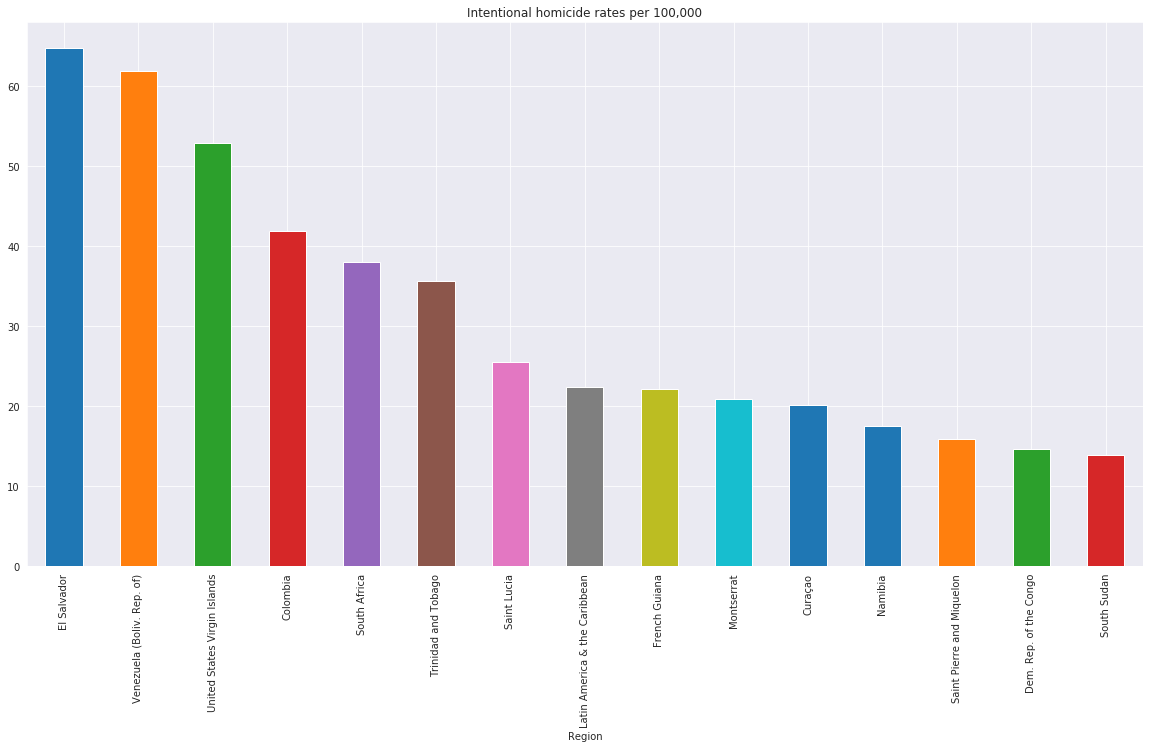

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
pivoted_max1['Intentional homicide rates per 100,000'].head(15).plot(kind='bar', rot=90,  title='Intentional homicide rates per 100,000')

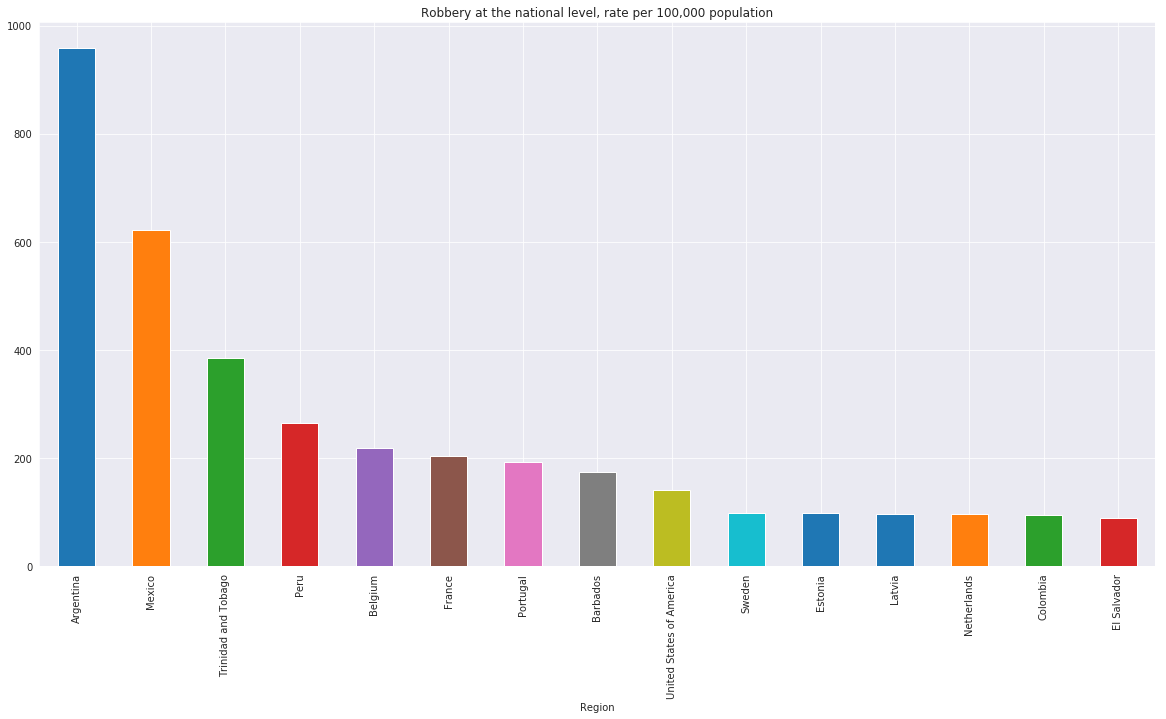

In [64]:
pivoted_max2=pivoted_max.sort_values(by="Robbery at the national level, rate per 100,000 population",ascending=False)
fig, ax = plt.subplots(figsize=(20, 10))
pivoted_max2['Robbery at the national level, rate per 100,000 population'].head(15).plot(kind='bar', rot=90,  title='Robbery at the national level, rate per 100,000 population')

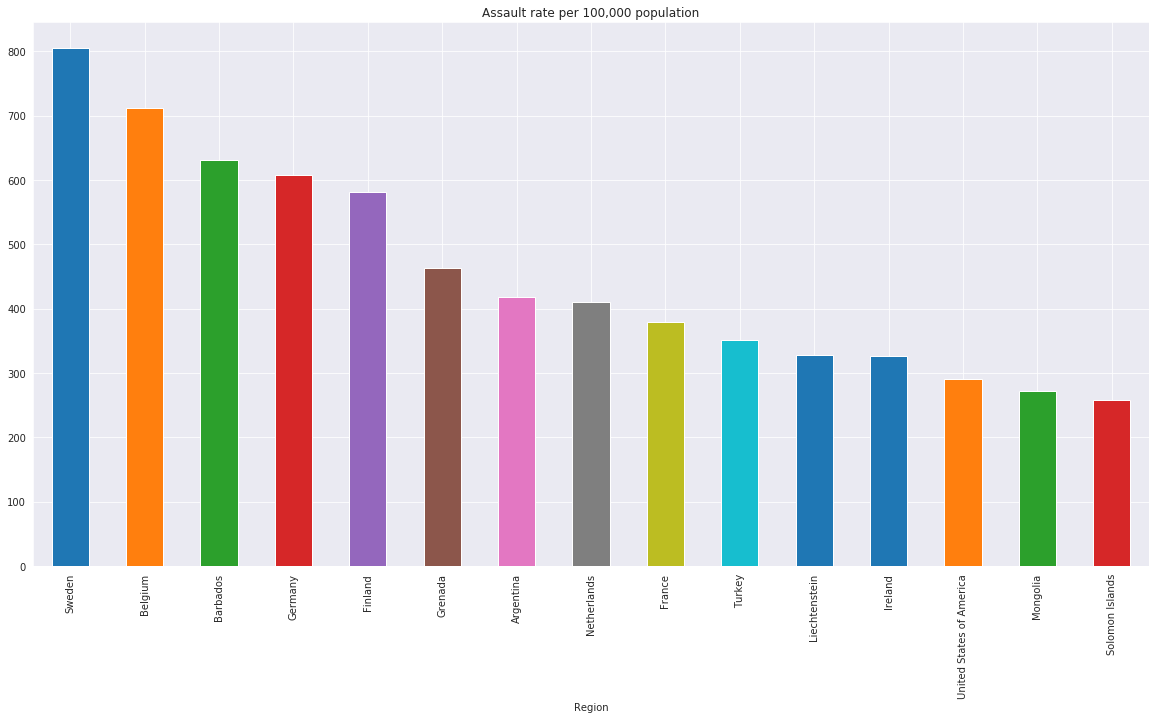

In [65]:
pivoted_max3=pivoted_max.sort_values(by="Assault rate per 100,000 population",ascending=False)
fig, ax = plt.subplots(figsize=(20, 10))
pivoted_max3["Assault rate per 100,000 population"].head(15).plot(kind='bar', rot=90,  title='Assault rate per 100,000 population')

In [66]:
del pivoted_max3,pivoted_max,df,pivoted_max2,pivoted


gc.collect()

7797

Some interesting plots (albeit not complete data! only introductory!) but it seems that there is a suprising prevelance of assault rate in unexpected places(as already stated in the beginning). Sweden, Belgium, Germany certainly do not classify as dangerous places to live. Assumption is that these countries have better/more effective police force that is able to cover and handle these types of crimes more effectively hence there are more assaults. If we were to compare that with worse crimes like murder, than the police can not look the other way and it is well documented that usuall countries will the top of the list.

# Nationmaster

Starting of with finding the crime data for the whole world, for a big number of years:

In [67]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20


In [68]:
nm = pd.read_csv('../input/nationmaster/Nationmaster.csv', encoding='latin1')
nm.rename(columns={'Unnamed: 0': "Country"}, inplace=1)
nm.shape


(234, 80)

In [69]:
#dropping data that is irrelevant and 
nm.drop(columns=[
	"Age of criminal responsibility %28notes%29", "Background",
	"Illicit drugs",
	"Minimum to serve before eligibility for requesting parole",
	"Prosecution rate",
	"Prosecution rate per million",
	"%25 sales"
], inplace=True)

print("deleting average countries: \n", nm[nm["Country"].str.match(".*average")]["Country"])
nm.drop(nm[nm["Country"].str.match(".*average")].index, inplace=True)


deleting average countries: 
 45                      Eastern Europe average
52             Former Soviet republics average
97                      NATO countries average
98                      European Union average
122          Group of 7 countries (G7) average
141                           Eurozone average
144                   Emerging markets average
172         High income OECD countries average
173            Non-religious countries average
180                             Europe average
207         Heavily indebted countries average
208            Former British colonies average
209                     OPEC countries average
210            Former Spanish colonies average
211    Middle Eastern and North Africa average
212                   Muslim countries average
213        Latin America and Caribbean average
214             Former French colonies average
231                         South Asia average
232             South and Central Asia average
Name: Country, dtype: object


In [70]:
#dropping countries we do not have data about
limit = 20  # drop all countries with data in less than x columns
bad_countries = (~nm.isna()).sum(axis=1)
print("deleting ", (bad_countries < 20).sum())
nm.drop(nm[bad_countries < 20].index, inplace=True)
nm.shape


deleting  107


(107, 73)

In [71]:
nm[nm["Country"].str.match(".*Un.*")]  # country name search


,Country,%25 of managers surveyed ranking this as a major business constraint,Acquitted,Acquitted per 1000,Adults prosecuted,Adults prosecuted per 1000,Age of criminal responsibility,Assault rate,Assault victims,Assaults,...,Robbery victims,Sentence Length,Serious assault rate,Serious assaults,Software piracy rate,Total crime victims,Total crimes,Total crimes per 1000,Unpaid diplomatic parking fines,Unpaid diplomatic parking fines per million
94,United Kingdom,NaN,54682.0,0.921724,1571570.0,26.490494,NaN,NaN,2.8,NaN,...,1.2,38.6,NaN,NaN,26.0,26.4,6523706.0,109.964046,0.0,0.0
121,United States,NaN,NaN,NaN,14203800.0,49.383018,6.0,NaN,1.2,786.7,...,0.6,29.0,NaN,281.6,20.0,21.1,11877218.0,41.294081,NaN,NaN
155,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.7,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,0.0,0.0


In [72]:
nm2 = nm.copy()


In [73]:
#dropping columns we do not have rows for enough countries
nm = nm2.copy()
limit = 60  # drop columns with more than x countries missing
bad_cols = nm.isna().sum(axis=0)
print("deleting ", (bad_cols > limit).sum(), ":\n", nm.columns[bad_cols > limit])
nm.drop(columns=nm.columns[bad_cols > limit],inplace=True)
print(nm.shape)
nm

deleting  21 :
 Index(['Assault victims', 'Believe in police efficiency', 'Bribery victims',
       'Convictions', 'Convictions per 1000', 'Drug trafficking', 'Executions',
       'Executions per million', 'Females prosecuted',
       'Females prosecuted per 1000', '2007', 'Term End', 'Sources', 'Murders',
       'Murders per million', 'Property crime victims', 'Rape victims',
       'Reporting to police', 'Robbery victims', 'Sentence Length',
       'Total crime victims'],
      dtype='object')
(107, 52)


,Country,%25 of managers surveyed ranking this as a major business constraint,Acquitted,Acquitted per 1000,Adults prosecuted,Adults prosecuted per 1000,Age of criminal responsibility,Assault rate,Assaults,Auto theft,...,Prosecutors,Rape rate,Robberies,Serious assault rate,Serious assaults,Software piracy rate,Total crimes,Total crimes per 1000,Unpaid diplomatic parking fines,Unpaid diplomatic parking fines per million
0,Guatemala,80.44,NaN,NaN,NaN,NaN,NaN,48.1,48.1,63.0,...,19.0,2.90,102.8,NaN,NaN,80.0,NaN,NaN,0.1,0.008499
1,Kenya,69.57,NaN,NaN,NaN,NaN,8.0,35.9,35.9,0.1,...,NaN,2.10,14.2,NaN,NaN,81.0,NaN,NaN,7.7,0.233330
3,Jamaica,54.44,NaN,NaN,NaN,NaN,NaN,421.9,421.9,10.0,...,NaN,24.40,90.8,220.0,220.0,NaN,39188.0,14.971565,0.0,0.000000
5,El Salvador,49.03,1456.0,0.242331,68031.0,11.322822,NaN,75.9,75.9,20.7,...,11.1,11.00,92.0,3.5,3.5,81.0,44762.0,7.450018,1.7,0.282942
6,Zambia,48.79,188.0,0.017693,251.0,0.023623,NaN,211.4,211.4,7.6,...,0.2,NaN,25.8,NaN,226.8,82.0,59426.0,5.592813,60.4,5.684480
10,Nicaragua,39.16,NaN,NaN,NaN,NaN,NaN,332.9,332.9,3.6,...,5.2,31.60,440.7,NaN,70.3,80.0,NaN,NaN,4.9,0.933586
11,Bangladesh,39.08,NaN,NaN,NaN,NaN,9.0,0.4,0.4,0.7,...,NaN,9.82,0.6,NaN,0.9,92.0,NaN,NaN,33.0,0.240865
14,Syria,29.61,NaN,NaN,NaN,NaN,NaN,28.0,28.0,4.5,...,1.9,0.80,4.3,0.9,0.9,NaN,NaN,NaN,52.7,3.100971
15,South Africa,29.02,NaN,NaN,NaN,NaN,10.0,1188.0,1188.0,201.6,...,5.5,132.40,494.5,576.5,576.5,34.0,2683849.0,58.942564,34.0,0.746706
16,Costa Rica,27.99,1753.0,0.428204,NaN,NaN,NaN,19.7,19.7,127.4,...,7.7,36.70,527.3,15.9,15.9,61.0,40263.0,9.835020,10.1,2.467121


In [74]:
import plotly.offline as py

import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

In [75]:
countriesraw = pd.read_csv('../input/plotly_countries/2014_world_gdp_with_codes.csv')
countries=countriesraw.copy()

countries["Country"]=countries["COUNTRY"]
countries=countries.drop(columns=["COUNTRY"])

nm.reset_index(inplace=True)

nm=nm.merge(countries,how="outer")

nm.sort_index(inplace=True)
nm.set_index("Country",inplace=True)
nm.columns

Index(['index',
       '%25 of managers surveyed ranking this as a major business constraint',
       'Acquitted', 'Acquitted per 1000', 'Adults prosecuted',
       'Adults prosecuted per 1000', 'Age of criminal responsibility',
       'Assault rate', 'Assaults', 'Auto theft',
       'Believes crime increasing in the past 3 years', 'Burglaries',
       'Car thefts', 'Car thefts per 1000', 'Counterfeiting',
       'Counterfeiting per million', 'Crime levels', 'Drug offences',
       'Drug related crime', 'Embezzlements', 'Embezzlements per million',
       'Frauds', 'Frauds per 1000', 'Jails', 'Jails per million', 'Judges',
       'Judges and Magistrates', 'Judges and Magistrates per million',
       'Kidnappings', 'Manslaughters', 'Manslaughters per million',
       'Murder rate', 'Per capita', 'Murders committed by youths',
       'Murders committed by youths per capita',
       'Murders committed by youths per million', 'Murders with firearms',
       'Murders with firearms per milli

In [76]:
column_name='Total crimes per 1000'
data = [ dict(
        type = 'choropleth',
        locations = nm['CODE'],
        z = nm[column_name].fillna(0),
        text = nm.index,
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = column_name),
      ) ]

layout = dict(
    title = 'world plot of '+column_name,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

nm[[column_name]].sort_values(by=column_name,ascending=0)


,Total crimes per 1000
Country,
Iceland,209.520630
Sweden,138.351800
United Kingdom,109.964046
New Zealand,108.200582
Finland,100.025805
Belgium,94.219322
Denmark,91.337854
Netherlands,88.108815
Canada,80.253747


# Importing UNO DC Crime data

In [77]:
unodc=None
fields=["Assault","Kidnapping","Theft","Robbery","Burglary","Domestic_Burglary","Theft_of_Private_Cars","Motor_Vehicle_Theft",
        "Total_Sexual_Violence","Rape","Sexual_Offences_ag_Children"]
string="abcdefghijk"

for i in range(len(string)):
    l=string[i]
    names=["%s_Rel_20%02d"%(fields[i],j) for j in range(3,15)]
    
    tmp= pd.read_csv('../input/unodc_crime/Publication Reports_1%s.csv'%l,sep=";",index_col=[2],header=None,skipinitialspace=True,skiprows=10, encoding='latin1',
                 names=[
        "Region","Sub-Region","Country",
        *["%s_Abs_20%02d"%(fields[i],j) for j in range(3,15)],
                     "nothing",
        *["%s_Rel_20%02d"%(fields[i],j) for j in range(3,15)]  
        ],
        
    )
    tmp.reset_index(inplace=True)
    tmp["Country"]=tmp["Country"].str.replace("*","").str.replace(" of America","").str.replace(" (England and Wales)","",regex=False).str.replace("Russian Federation","Russia").str.replace("Republic of ","").str.replace(" (Plurinational State of)","",regex=False).str.replace("Korea","Korea, South",regex=False)
    tmp.set_index("Country",inplace=True)
    tmp.drop(columns=["Region","Sub-Region","nothing"],inplace=True)
    for n in names:
        tmp[n]=tmp[n].str.replace(".","").str.replace(",([0-9])$",lambda m: "."+m[1]).astype(float)
    tmp=tmp.loc[tmp.index.dropna()]
    
    unodc=tmp  if unodc is None else unodc.merge(tmp,how="outer",on="Country")
unodc.drop("Country/territory",inplace=True)
#unodc.rename(columns={'Country/territory':'Subcontinent'},inplace=True)

In [78]:
countries=pd.read_csv('../input/plotly_countries/2014_world_gdp_with_codes.csv')
countries["Country"]=countries["COUNTRY"]
countries=countries.drop(columns=["COUNTRY","GDP (BILLIONS)"])


#unodc["CC"]=countries.loc[unodc["Country"].str.replace("*","")].reset_index()["CODE"]
unodc=unodc.reset_index().merge(countries,how="outer")

unodc.sort_index(inplace=True)
unodc.set_index("Country",inplace=True)

In [79]:
unodc_mult=pd.DataFrame()
tmp=pd.DataFrame()
for i in range(3,15):
    tmp=unodc[["%s_Abs_20%02d"%(f,i) for f in fields]+["%s_Rel_20%02d"%(f,i) for f in fields]]
    tmp.columns=tmp.columns.str.replace("_20%02d"%i,"")
    tmp["Year"]=2000+i
    tmp=tmp.reset_index().set_index(["Country","Year"])
    unodc_mult=unodc_mult.append(tmp)
unodc_mult=unodc_mult.sort_index()
unodc_mult = unodc_mult.reset_index()
unodc_mult.rename(columns={'Country':'Region'},inplace=True)
unodc_mult = unodc_mult.set_index(['Region','Year'])
unodc_mult[:15]

Assault_Abs  Kidnapping_Abs Theft_Abs Robbery_Abs  \
Region      Year                                                      
Afghanistan 2003          NaN             NaN       NaN         NaN   
            2004          NaN             NaN       NaN         NaN   
            2005          NaN             NaN       NaN         NaN   
            2006          NaN             NaN       NaN         NaN   
            2007          NaN             NaN       NaN         NaN   
            2008          NaN             NaN       NaN         NaN   
            2009          NaN             NaN       NaN         NaN   
            2010          NaN             NaN       NaN         NaN   
            2011          NaN             NaN       NaN         NaN   
            2012          NaN             NaN       NaN         NaN   
            2013          NaN             NaN       NaN         NaN   
            2014          NaN             NaN       NaN         NaN   
Albania     2003          NaN             NaN       NaN         NaN   
            2004          NaN             NaN       NaN         NaN   
            2005        165.0             NaN     2.986         199   

                 Burglary_Abs Domestic_Burglary_Abs  \
Region      Year                                      
Afghanistan 2003          NaN                   NaN   
            2004          NaN                   NaN   
            2005          NaN                   NaN   
            2006          NaN                   NaN   
            2007          NaN                   NaN   
            2008          NaN                   NaN   
            2009          NaN                   NaN   
            2010          NaN                   NaN   
            2011          NaN                   NaN   
            2012          NaN                   NaN   
            2013          NaN                   NaN   
            2014          NaN                   NaN   
Albania     2003          NaN                   NaN   
            2004          NaN                   NaN   
            2005          199                   675   

                  Theft_of_Private_Cars_Abs Motor_Vehicle_Theft_Abs  \
Region      Year                                                      
Afghanistan 2003                        NaN                     NaN   
            2004                        NaN                     NaN   
            2005                        NaN                     NaN   
            2006                        NaN                     NaN   
            2007                        NaN                     NaN   
            2008                        NaN                     NaN   
            2009                        NaN                     NaN   
            2010                        NaN                     NaN   
            2011                        NaN                     NaN   
            2012                        NaN                     NaN   
            2013                        NaN                     NaN   
            2014                        NaN                     NaN   
Albania     2003                        NaN                     NaN   
            2004                        NaN                     NaN   
            2005                      708.0                     708   

                  Total_Sexual_Violence_Abs  Rape_Abs  \
Region      Year                                        
Afghanistan 2003                        NaN       NaN   
            2004                        NaN       NaN   
            2005                        NaN       NaN   
            2006                        NaN       NaN   
            2007                        NaN       NaN   
            2008                        NaN       NaN   
            2009                        NaN       NaN   
            2010                        NaN       NaN   
            2011                        NaN       NaN   
            2012                       

In [80]:
df=pd.read_csv('../input/crimes-un-datacsv/Crimes_UN_data.csv', skiprows=[0],thousands=",", encoding='latin1')
cols = list(df.columns)
cols[1] = 'Region'
df.columns = cols
pivoted = pd.pivot_table(df, values='Value', index=['Region', 'Year'], columns='Series', aggfunc=sum)

un_crimes=pivoted
un_crimes=un_crimes.rename({"United States of America": "United States"}, axis='index')

In [81]:
unodc_un=unodc_mult.merge(un_crimes, left_index=True, right_index=True,how="outer")
unodc_un.columns=unodc_un.columns.str.replace(" per 100,000"," Rel",regex=False).str.replace(" population","",regex=False)
unodc_un.index.levels[0][unodc_un.index.levels[0].str.match("United")]

Index(['United Arab Emirates', 'United Kingdom',
       'United Kingdom (Northern Ireland)', 'United Kingdom (Scotland)',
       'United Rep. of Tanzania', 'United States',
       'United States Virgin Islands'],
      dtype='object', name='Region')

In [82]:
column=fields[2]
year=3
column_name="%s_Rel_20%02d"%(column,year) 
plot=unodc[column_name].fillna(0)#.str.replace(',', '')
CCs=unodc['CODE']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = unodc.index,
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'world plot of '+column_name.replace("_"," "),
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )
#plot.sort_values(ascending=False)[:20]

<a id="4"></a> <br>
### Question 2: Which countries have the highest crime crates?
Approach: take all the different categories of crimes we have data about, average them over the years if existing, then normalising them to 
my=0, sigma=1, and then finding an average of the categories for each country. 

In [83]:
unodc_avg_year=pd.DataFrame()
unodc_avg=pd.DataFrame()
unodc_max_cat=pd.DataFrame()
for f in fields: # trying to use only these to not let rare crimes play big role, but no difference:
                #["Robbery","Assault","Kidnapping","Burglary","Theft_of_Private_Cars"]:
    names=["%s_Rel_20%02d"%(f,j) for j in range(3,15)]
    unodc_avg_year[f]=unodc[names].mean(axis=1)
un_fields=['Assault rate Rel',
       'Intentional homicide rates Rel',
       'Kidnapping at the national level, rate Rel',
       'Percentage of male and female intentional homicide victims, Female',
       'Percentage of male and female intentional homicide victims, Male',
       'Robbery at the national level, rate Rel',
       'Theft at the national level, rate Rel',
       'Total Sexual Violence at the national level, rate Rel']
for f in un_fields:
    print(f)
    names=["%s_Rel_20%02d"%(f,j) for j in range(3,15)]
    unodc_avg_year[f]=unodc_un[f].unstack(level=1).astype(float).mean(axis=1)
    
unodc_avg_year-=unodc_avg_year.mean()
unodc_avg_year/=unodc_avg_year.std()
unodc_avg["crime_score"]=unodc_avg_year.mean(axis=1)
unodc_avg["crime_score"]-=unodc_avg["crime_score"].min()
unodc_avg["crime_score"].fillna(0,inplace=True)
unodc_avg["CODE"]=unodc["CODE"]
unodc_avg_year.loc[["United States","Sweden","Austria","Mexico","Morocco","Serbia"]]

Assault rate Rel
Intentional homicide rates Rel
Kidnapping at the national level, rate Rel
Percentage of male and female intentional homicide victims, Female
Percentage of male and female intentional homicide victims, Male
Robbery at the national level, rate Rel
Theft at the national level, rate Rel
Total Sexual Violence at the national level, rate Rel


,Assault,Kidnapping,Theft,Robbery,Burglary,Domestic_Burglary,Theft_of_Private_Cars,Motor_Vehicle_Theft,Total_Sexual_Violence,Rape,Sexual_Offences_ag_Children,Assault rate Rel,Intentional homicide rates Rel,"Kidnapping at the national level, rate Rel","Percentage of male and female intentional homicide victims, Female","Percentage of male and female intentional homicide victims, Male","Robbery at the national level, rate Rel","Theft at the national level, rate Rel","Total Sexual Violence at the national level, rate Rel"
Country,,,,,,,,,,,,,,,,,,,
United States,0.228803,NaN,1.491683,0.106224,0.931175,1.226546,2.367706,1.391115,NaN,1.257369,NaN,0.371585,-0.209416,NaN,-0.044640,-0.198675,0.131707,1.455763,NaN
Sweden,2.337395,NaN,3.868487,-0.051089,1.916119,1.056658,2.003232,2.462771,3.212335,2.543811,4.454574,0.550426,-0.610148,NaN,-0.724834,-0.534884,-0.013229,3.949298,3.031447
Austria,-0.551339,-0.585898,1.300355,-0.255566,2.262674,0.059255,-0.033557,-0.100655,-0.078292,-0.132685,0.431544,-0.524954,-0.645412,-0.625025,-0.753779,-0.571500,-0.290774,1.293801,0.033346
Mexico,0.009495,-0.387585,-0.771861,2.133580,-0.488912,-0.423849,NaN,0.383754,-0.111151,0.069851,-0.779563,-0.084982,0.819663,-0.400903,0.490833,0.813282,1.841115,-0.722692,-0.072365
Morocco,-0.266820,-0.245075,-0.590392,-0.211893,-0.844410,-0.705765,-0.646263,-0.502209,-0.653253,-0.516860,-0.674801,-0.139978,-0.575525,-0.123419,-0.811668,-0.498267,-0.238486,-0.544628,-0.608914
Serbia,-0.654573,-0.550099,-0.636486,-0.312164,-0.375104,-0.498500,-0.200433,-0.424842,-0.712976,-0.680978,-0.686855,-0.636730,-0.571677,-0.571663,-0.623529,-0.506589,-0.375470,-0.605218,-0.709295


WHAT? It does not make any sence. Sweden? It is because people have more trust, less corruption, better reporting system punishments etc... IN ORDER To mitigate this effect and get the TRUE levels we ought to normalise these values with all of the values/data that I just named, and even more since these are (probably) correct assumptions of why the results are odd. That implies finding ALL of these datasets that coincide with ALL of the countries on ALL of the years. We are going find some data two rows underneath and than normalise total crime for a better result.

In [84]:
column_name="crime_score"
data = [ dict(
        type = 'choropleth',
        locations = unodc_avg['CODE'],
        z = unodc_avg['crime_score'],
        text = unodc.index,
        colorscale =[[0.0, 'rgb(255,255,255)'],[1e-6, 'rgb(237,235,242)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            #autotick = False,
            title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'world plot of '+column_name.replace("_"," "),
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )
#import plotly.io as pio
#pio.write_image(fig, 'world_avg_cr.pdf')
unodc_avg[["crime_score"]].sort_values(by="crime_score",ascending=False)[:10]

,crime_score
Country,
South Africa,3.281289
Swaziland,2.605883
St. Vincent and the Grenadines,2.469008
Sweden,2.460868
Belgium,2.338773
Bahamas,2.160319
Bermuda,2.115008
St. Kitts and Nevis,1.957209
Saint Kitts and Nevis,1.940266


In [85]:
corruption=pd.read_csv("../input/unodc_crime/theglobaleconomy_corruption.csv", sep=", ")
corruption["Rule of law"]=corruption["Rule of law"].astype(float)

corruption["Corruption perceptions - Transparency International"]=corruption["Corruption perceptions - Transparency International"].str.replace(",","").fillna(-1).astype(int).replace(-1, np.nan)
corruption.set_index(["Country","Code","Year"],inplace=True)
corruption_avg=pd.DataFrame()
corruption
corruption_avg["Rule of law"]=2.5-corruption["Rule of law"].unstack(level=2).mean(axis=1)
corruption_avg["Corruption Perception"]=100-corruption["Corruption perceptions - Transparency International"].unstack(level=2).mean(axis=1)
corruption_avg[["Rule of law","Corruption Perception"]]-=corruption_avg[["Rule of law","Corruption Perception"]].mean(axis=0)
corruption_avg[["Rule of law","Corruption Perception"]]/=corruption_avg[["Rule of law","Corruption Perception"]].std(axis=0)
corruption_avg["corruption_score"]=corruption_avg.mean(axis=1)
corruption_avg.reset_index(inplace=True)
corruption_avg.set_index(["Country"],inplace=True)
corruption_avg[:10]

,Code,Rule of law,Corruption Perception,corruption_score
Country,,,,
Afghanistan,AFG,1.692312,1.563656,1.627984
Albania,ALB,0.516100,0.554086,0.535093
Algeria,DZA,0.711616,0.516025,0.613820
Andorra,AND,-1.318323,NaN,-1.318323
Angola,AGO,1.283364,1.064104,1.173734
Antigua and Barbuda,ATG,-0.861860,NaN,-0.861860
Argentina,ARG,0.648521,0.569310,0.608916
Armenia,ARM,0.382900,0.527443,0.455171
Aruba,ABW,-1.172465,NaN,-1.172465


In [86]:
column_name="corruption"
data = [ dict(
        type = 'choropleth',
        locations = corruption_avg['Code'],
        z = corruption_avg['corruption_score'],
        text = corruption_avg.index,
        colorscale =[[0.0, 'rgb(255,255,255)'],[1e-6, 'rgb(237,235,242)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            #autotick = False,
            title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'world plot of '+column_name.replace("_"," "),
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )
#import plotly.io as pio
#pio.write_image(fig, 'world_avg_cr.pdf')
corruption_avg[["corruption_score"]].sort_values(by="corruption_score",ascending=False)[:10]

,corruption_score
Country,
Somalia,1.923965
Afghanistan,1.627984
North Korea,1.488615
Iraq,1.384190
Burma (Myanmar),1.336567
Zimbabwe,1.317133
Turkmenistan,1.308093
Venezuela,1.308023
Democratic Republic of the Congo,1.289816


In [87]:
unodc_w=unodc_avg.reset_index().merge(corruption_avg,left_on="CODE",right_on="Code").set_index("Country")
unodc_w["crime_score_w"]=unodc_w["crime_score"]+(unodc_w["corruption_score"]/3)
unodc_w.sort_values(by="crime_score_w",ascending=False)[:10]

,crime_score,CODE,Code,Rule of law,Corruption Perception,corruption_score,crime_score_w
Country,,,,,,,
South Africa,3.281289,ZAF,ZAF,-0.174048,-0.205233,-0.189640,3.218076
Swaziland,2.605883,SWZ,SWZ,0.567511,0.368728,0.468119,2.761923
Guinea-Bissau,1.717304,GNB,GNB,1.299722,1.056492,1.178107,2.110007
Belgium,2.338773,BEL,BEL,-1.437502,-1.615395,-1.526449,1.829957
Bermuda,2.115008,BMU,BMU,-0.970912,NaN,-0.970912,1.791371
Lesotho,1.732570,LSO,LSO,0.149215,0.152368,0.150792,1.782834
Grenada,1.732379,GRD,GRD,-0.203648,0.363780,0.080066,1.759068
Suriname,1.657594,SUR,SUR,0.090015,0.339041,0.214528,1.729104
Sweden,2.460868,SWE,SWE,-1.999903,-2.464157,-2.232030,1.716858


In [88]:
column_name="crime_score_including_corruption"
data = [ dict(
        type = 'choropleth',
        locations = unodc_w['CODE'],
        z = unodc_w['crime_score_w'],
        text = unodc_w.index,
        colorscale =[[0.0, 'rgb(255,255,255)'],[1e-6, 'rgb(237,235,242)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            #autotick = False,
            title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'world plot of '+column_name.replace("_"," "),
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )
#import plotly.io as pio
#pio.write_image(fig, 'world_avg_cr.pdf')

<a id="5"></a> <br>
### Question 4: Do different countries have different types of crimes dominating?

In [89]:
unodc_max_cat["max_cat"]=unodc_avg_year[fields].idxmax(axis=1)
unodc_max_cat["CODE"]=unodc["CODE"]
unodc_max_cat["max_cat_ind"]=unodc_max_cat["max_cat"].map(dict((f[1],f[0]+1)for f in enumerate(fields)))
unodc_max_cat["max_cat_ind"]=unodc_max_cat["max_cat_ind"].fillna(0)

In [90]:
column_name="world_max_crime_category"
colors=['#ffffff','#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
'#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']
data = [ dict(
        type = 'choropleth',
        locations = unodc_max_cat['CODE'],
        z = unodc_max_cat['max_cat_ind'],
        text = unodc_max_cat["max_cat"].str.replace("_"," "),
        colorscale = [[i/11, colors[i]] for i in range(0,12)],
        autocolorscale = False,
        reversescale = False,
        show_scale=True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            title = "colors"
        ),
      ) ]

layout = dict(
    title = 'world plot of '+column_name.replace("_"," "),
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map2' )
unodc_max_cat[["max_cat"]].loc[["Austria","United States","United Kingdom","Serbia","Croatia","India"]]

,max_cat
Country,
Austria,Burglary
United States,Theft_of_Private_Cars
United Kingdom,Theft
Serbia,Theft_of_Private_Cars
Croatia,Burglary
India,Kidnapping


# ECONOMIC FACTORS


In this section we are going to load and preprocess data concerning economic factors such as: Inflation rate, Unemployment rate and GDP per capita. We have chosen this three factors because we think they are the most important and a lot of other factors are highly correlated to this three. With this and social factors data sets we are trying to answer the question: "Are there typical characteristics of countries with high/low crime rates?".

In [91]:
df8 = pd.read_csv('../input/economdata/economfaktoren.csv', encoding='latin1')
df8.head()

,Country,Code,Year,Inflation,Unemployment rate,GDP per capita current dollars
0,Afghanistan,AFG,2000,,11.18,
1,Afghanistan,AFG,2001,,11.58,117.41
2,Afghanistan,AFG,2002,,8.69,187.85
3,Afghanistan,AFG,2003,,8.85,198.73
4,Afghanistan,AFG,2004,,10,219.14


As we can see this data set goes from 2000 to 2015 and there are still some non-existent values that we need to fill with right sources or best techiniques possible. First we are going to change names of some columns and drop one column and then fill the data set.

In [92]:
cols2 = list(df8.columns)
cols2[0] = 'Region'
cols2[2] = 'Year'
cols2[3] = 'Inflation rate(%)'
cols2[4] = 'Unemployment rate(%)'
cols2[5] = 'GDP per capita'
df8.columns = cols2
df8 = df8.drop(["Code"],1)
df8.head()

,Region,Year,Inflation rate(%),Unemployment rate(%),GDP per capita
0,Afghanistan,2000,,11.18,
1,Afghanistan,2001,,11.58,117.41
2,Afghanistan,2002,,8.69,187.85
3,Afghanistan,2003,,8.85,198.73
4,Afghanistan,2004,,10,219.14


## FILLING THE DATA SET

In [93]:
#filling the data set
df8.ix[0:4,2]=[4.2,4.9,5.1,11.7,11.2] #data on Afghanistan Inflation rate 2000-2004(sources: The World Bank, International Monetery Fund) )
df8.ix[0,4]=[176]#Afghanistan GDP per capita 2000(source:countryeconomy.com)
df8.set_index(['Region','Year'],inplace=True)#setting the index
df8.loc [['Argentina'], ['Inflation rate(%)']] = [-0.9,-1.1,25.9,13.4,4.4,9.6,10.9,8.8,8.6,6.3,10.5,9.8,10.0,10.6,38.0,26.7]#data on Argentinian inflation rate 2000-2015(sources:Index mundi, FocusEconomics)
df8.loc [['Antigua and Barbuda'], ['Unemployment rate(%)']] = [8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4,8.4]#there is no data on Antigua and Barbada unemployment rate by year so I just wrote an average unempoyment rate found on Index mundi 
df8.loc [['Bosnia and Herzegovina'],['Inflation rate(%)']] = [5,4.6,0.3,0.5,0.3,3.6,6.1,1.5,7.4,-0.4,2.1,3.7,2.1,-0.1,-0.9,-1]#data on BIH inflation rate 2000-2015(sources:Index mundi)
df8.loc [['Comoros'], ['Inflation rate(%)']] = [5.9,5.6,3.5,3.8,4.5,3,3.4,4.5,1.7,4.4,3.4,1.8,6.3,-4.3,1.35,2]#sources:KNOEMA.com, STATISTA.com
df8.loc [['Cuba'],['Inflation rate(%)']] = [2.6,4.9,7.1,4.1,3.1,7,5,3.1,3.4,-0.5,2.9,4.7,5.5,6,5.3,4.6]#source:Index mundi
df8.loc [['Iraq'],['GDP per capita']] = [1097,781,761,609,1391.82,1849.6,2351.81,3129.22,4521.03,3735.14,4502.75,5854.61,6651.12,6925.22,6703.07,4974.03]#source:countryeconomy.com

#Data on Dominica Unemployment rate
Youth_unemployment = [13.6,14,13.6,14.4,13.9,12.9,10.5,11.8,10.2,12,10.3,13.3,14.3,16.9,12.9,13.6]#data on youth employment in Dominica
Ratio = [23/13.6]*16 #Ratio between only year that I found on unemployment rate(2000,source:Index mundi) and youth unemployment rate in 2000 
New_unemployment_rate =[] 
end_index = len(Youth_unemployment)

for i in range(end_index):
    New_unemployment_rate.append(Youth_unemployment[i]*Ratio[i])
    
New_unemployment_rate = [round(x,1) for x in New_unemployment_rate] #rounding on one decimal place
df8.loc [['Dominica'],['Unemployment rate(%)']] = New_unemployment_rate 

##there wasn't much data on Grenada unemployment rate
df8.loc [['Grenada'],['Unemployment rate(%)']] = [12.5,9.9,14.4,14.4,14.4,18.8,22,22,25,25,25,25,28.8,32.5,29.3,28.9]#sources:Index mundi, GOV.gd,2002-2004(took average of 2001 and 2005),2006,2007(took average with respect to 2005 and 2008),2009,2010(avg of 2008,2011),2012(avg of 2011 and 2013)

df8.loc [['Guinea'],['Inflation rate(%)']] = [6.8,5.4,3,11,17.5,31.4,34.7,22.8,18.4,4.7,15.5,21.4,15.2,11.9,9.7,8.2]#source:Index mundi
df8.loc [['Lebanon'],['Inflation rate(%)']] = [-0.4,-0.4,1.8,1.3,1.7,-0.7,5.6,4.1,10.8,1.2,4,5,6.6,4.8,1.9,-3.7]#source:Index mundi
df8.loc [['Liberia'],['Inflation rate(%)']] = [5,8,14.2,10.3,7.8,10.8,7.3,11.4,17.5,7.4,7.3,8.5,6.8,7.6,9.9,7.7]#source:Index mundi
df8.loc [['Libya'],['Inflation rate(%)']] = [-2.9,-8.8,-9.8,-2.2,-2.2,2.7,1.5,6.3,10.4,2.5,2.8,15.5,6.1,2.6,2.4,9.8]#source:Statistic.com
df8.loc [['Maldives'],['Inflation rate(%)']] = [-1.2,0.7,4.2,-1.3,-1.7,1.3,2.7,6.8,12,4.5,6.1,11.3,10.9,3.8,2.1,1]#source:FactFish
df8.loc [['Montenegro'],['Inflation rate(%)']] = [29.9,23.7,19.7,7.5,3.1,3.4,2.9,4.3,8.8,3.5,0.7,3.5,4.1,2.2,-0.7,1.5]#source:KNOEMA.com
df8.loc [['Mozambique'],['Inflation rate(%)']] = [12.7,9.1,16.8,13.5,12.6,6.4,13.2,8.2,14.5,3.8,12.4,11.2,2.6,4.3,2.6,3.6]#source:KNOEMA.com
df8.loc [['Namibia'],['Inflation rate(%)']] = [10.2,10.2,12.7,7.1,4.1,2.3,5.0,6.5,9.1,9.5,4.9,5.0,6.7,5.6,5.3,3.4]#source:KNOEMA.com
df8.loc [['Oman'],['Inflation rate(%)']] = [-1.2,-0.8,-0.3,0.2,0.8,1.9,3.2,6.0,12.1,3.9,3.2,4.0,2.9,1.0,1.0,0.1]#source:KNOEMA.com
df8.loc [['Puerto Rico'],['Inflation rate(%)']] = [5.7,0.6,5,6.5,2.5,5.6,5.2,4.2,5.2,0.3,2.5,3.6,1.3,0.9,0.9,-0.3]#sources:FactFish,Index mundi,FocusEconomics
df8.loc [['Sao Tome and Principe'],['GDP per capita']] = [568,505.79,551.20,643.95,687.55,804.13,836.80,886.67,1126.46,1099.57,1129.76,1304.33,1380.95,1619.53,1824.38,1613.48]#source:IMF
df8.loc [['Seychelles'],['Unemployment rate(%)']] = [3.1,4.4,4.1,3.2,3.5,3.6,2.5,1.9,1.7,5.1,4.6,4.1,3.7,3.3,3.0,2.7]#sources:STATISTA, Index mundi
df8.loc [['Sierra Leone'],['Inflation rate(%)']] = [-0.9,2.6,0.1,4.0,12.9,13.7,10.5,11.6,8.2,7.5,7.2,6.8,6.6,5.5,4.6,6.7]#sources:KNOEMA.com
df8.loc [['Syria'],['Inflation rate(%)']] = [-3.8,3.0,-0.1,5.8,4.4,7.2,10.0,3.9,15.7,2.9,4.4,4.8,36.7,89.6,29.2,38.1]#sources:CIA World Factbook
df8.loc [['Syria'],['GDP per capita']] = [1177.63,1258.42,1263.01,1253.39,1408.85,1577.46,1762.25,2058.04,2557.2,2557.3,2806.7,2573,3608,2800,3300,2900]#sources:CIA, countryeconomy.com
df8.loc [['Tajikistan'],['Inflation rate(%)']] = [32.9,38.6,12.2,16.3,7.1,7.1,10.0,13.1,20.5,6.4,6.4,12.4,5.8,5.0,6.1,5.7]#source:CIA World Factbook
df8.loc [['Turkmenistan'],['Inflation rate(%)']] = [8.0,11.6,8.8,5.6,5.9,10.7,8.2,6.3,14.5,-2.7,4.4,5.3,5.3,6.8,6.0,7.4]#source:KNOEMA.com
df8.loc [['United Arab Emirates'],['Inflation rate(%)']] = [1.3,2.8,2.9,3.1,5.0,6.2,9.3,11.1,12.3,1.6,0.9,0.9,0.7,1.1,2.3,4.1]#source:KNOEMA.com
df8.loc [['Uzbekistan'],['Inflation rate(%)']] = [25,27.3,27.3,12.5,7.3,10.7,13.1,11.2,13.1,12.3,12.3,12.4,11.9,11.7,9.1,8.5]#source:KNOEMA.com
df8.loc [['Venezuela'],['Inflation rate(%)']] = [13,12.3,31.2,31.1,22.4,16.0,15.8,18.7,30.4,27.1,28.2,26.1,21.1,40.6,62.2,121.7]#source:Index mundi
df8.loc [['Venezuela'],['GDP per capita']] = [4783.53,4926.31,3655.98,3232.52,4271.37,5432.69,6735.80,8318.80,11227.23,11536.15,13545.26,10741.58,12755.00,12237.19,15692.41,30775.00]#source:CEIC
df8.loc [['Yemen'],['Inflation rate(%)']] = [4.6,11.9,12.2,10.8,12.5,11.8,10.8,7.9,19.0,5.4,11.2,19.5,9.9,11.0,8.1,12]#source:statistic.com
df8.loc [['Zimbabwe'],['Inflation rate(%)']] = [4.5,-37.2,-34.4,-8.6,113.6,-31.5,33.0,-72.7,157.0,6.2,3.0,3.5,3.7,1.6,-0.2,-2.4]#source:KNOEMA.com


df8.head()

Inflation rate(%) Unemployment rate(%) GDP per capita
Region      Year                                                      
Afghanistan 2000               4.2                11.18            176
            2001               4.9                11.58         117.41
            2002               5.1                 8.69         187.85
            2003              11.7                 8.85         198.73
            2004              11.2                   10         219.14

This procedure wasn't the easiest because there a lot of countries which aren't really transparent or they just don't keep track on some of the economic factors. We mostly tried to find another sources other than our primary source (THEGLOBALECONOMY.COM). These sources included sites: Index mundi, FOCUSECONOMICS.com, STATISTA, CIA World Factbook, GOV.gd, FACTFISH.com, KNOEMA.com, Interational Monetary Fund, COUNTRYECONOMY.com, STATISTIC.com. We couldn't find a lot of information about Dominica and Grenada so we used some techinques. For Dominica we found only one year (2000) concerning unemployment rate but we managed to find another data set that should be highly correlated to Dominica unemployment rate and that is youth unemployment rate. We took ratio between unemployment rate (2000) and youth unemployment rate (2000) and multiplied youth unenmployment rate list with that ratio. In the case of Grenada unemployment rate set, we had a lot of holes in our list, so what we did was mostly manual interpolation with a help of some internet sites (mostly KNOEMA.com) that provided average unemployment rates for some years. 

Preparing data set on economic factors for merging

In [94]:
#setting all values as floats
df8.loc[:,'Inflation rate(%)'] = df8.loc[:,'Inflation rate(%)'].astype('float')/100
#we want to have unemployment per capita for our last model so I am dividing whole column with 100
df8.loc[:,'Unemployment rate(%)'] = df8.loc[:,'Unemployment rate(%)'].astype('float')/100
df8.loc[:,'GDP per capita'] = df8.loc[:,'GDP per capita'].astype('float') 

cols3 = list(df8.columns)
cols3[0] = 'Inflation rate' 
cols3[1] = 'Unemployment rate per capita'
df8.columns = cols3
#pd.set_option('display.max_rows',3000)
df_econ_max=df8
df8.head()

Inflation rate  Unemployment rate per capita  GDP per capita
Region      Year                                                              
Afghanistan 2000           0.042                        0.1118          176.00
            2001           0.049                        0.1158          117.41
            2002           0.051                        0.0869          187.85
            2003           0.117                        0.0885          198.73
            2004           0.112                        0.1000          219.14

## PLOTTING

### GDP PER CAPITA PLOT

In [95]:
df8_plot=df8.reset_index()

column_name='GDP per capita'
data = [ dict(
        type = 'choropleth',
        locations = df8_plot['Region'].astype(str),
        locationmode = 'country names',
        z = df8_plot[column_name].astype(float),
        #text = df8['Code'].astype(str),
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = column_name),
      ) ]

layout = dict(
    title = 'world plot of GDP per capita (2000)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d8-world-map' )


### INFLATION RATE PLOT

In [96]:
column_name='Inflation rate'
data = [ dict(
        type = 'choropleth',
        locations = df8_plot['Region'].astype(str),
        locationmode = 'country names',
        z = df8_plot[column_name].astype(float),
        #text = df8['Code'].astype(str),
        colorscale = [[0,"rgb(172, 10, 5)"],[0.35,"rgb(190, 60, 40)"],[0.5,"rgb(245, 100, 70)"],\
            [0.6,"rgb(245, 120, 90)"],[0.7,"rgb(247, 137, 106)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = column_name),
      ) ]

layout = dict(
    title = 'world plot of Inflation rate (2000)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d8-world-map' )

### UNEMPLOYMENT RATE PER CAPITA PLOT

In [97]:
column_name='Unemployment rate per capita'
data = [ dict(
        type = 'choropleth',
        locations = df8_plot['Region'].astype(str),
        locationmode = 'country names',
        z = df8_plot[column_name].astype(float),
        #text = df8['Code'].astype(str),
        colorscale = [[0,"rgb(5, 172, 10)"],[0.35,"rgb(40, 190, 60)"],[0.5,"rgb(70, 245, 100)"],\
            [0.6,"rgb(90, 245, 120)"],[0.7,"rgb(106, 247, 137)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = column_name),
      ) ]

layout = dict(
    title = 'world plot of Unemployment rate per capita (2000)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d8-world-map' )


# **SOCIAL FACTORS**

The following datasets are observations for 1950-2015 for 201-232 different countries.

**Total population**

In [98]:
df_total_pop = pd.read_csv('../input/population-un-data/Total_population_both_sexes.csv',
                           sep=';', encoding='latin', decimal = ',',skiprows=[0])
df_total_pop.head()

,Country,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Burundi,2 309,2 359,2 404,2 445,2 487,2 531,2 578,2 627,2 679,...,7 675,7 940,8 212,8 489,8 767,9 044,9 320,9 600,9 892,10 199
1,Comoros,159,163,167,170,173,176,179,182,185,...,626,642,657,673,690,707,724,742,759,777
2,Djibouti,62,63,65,66,68,70,71,74,76,...,796,809,823,837,851,866,881,897,912,927
3,Eritrea,1 142,1 160,1 180,1 201,1 224,1 249,1 276,1 303,1 333,...,4 067,4 153,4 233,4 310,4 391,4 475,4 561,4 651,4 746,4 847
4,Ethiopia,18 128,18 467,18 820,19 184,19 560,19 947,20 348,20 764,21 201,...,78 851,81 000,83 185,85 416,87 703,90 047,92 444,94 888,97 367,99 873


We reshape the datasets into tidy format and do some preprocessing...

In [99]:
df_total_pop_formatted = pd.melt(df_total_pop, ['Country'], var_name = 'Year', value_name = 'Total population in 1,000')
df_total_pop_formatted.columns = ['Region', 'Year', 'Total population in 1,000']
df_total_pop_formatted = df_total_pop_formatted.sort_values(by = ['Region','Year'])
country_names = df_total_pop_formatted.Region
df_total_pop_formatted.Year = df_total_pop_formatted.Year.astype(int)
df_total_pop_formatted.iloc[:,2] = df_total_pop_formatted.iloc[:,2].str.replace(' ', '')
df_total_pop_formatted.iloc[:,2] = df_total_pop_formatted.iloc[:,2].astype(np.float64)
df_total_pop_formatted = df_total_pop_formatted.loc[df_total_pop_formatted['Year'] >1999,:]

In [100]:
country_names2 = country_names.drop_duplicates()

There are some names we want to change...

In [101]:
false_names = ['Ivory Coast+A168', 'Viet Nam','Cabo Verde']
new_names = ['Ivory Coast', 'Vietnam','Cape Verde']
df_total_pop_formatted = df_total_pop_formatted.replace(to_replace=false_names, value=new_names)
df_total_pop_formatted = df_total_pop_formatted.sort_values(by = ['Region','Year'])

In [102]:
country_names = df_total_pop_formatted.Region
country_names2 = country_names.drop_duplicates()

**Population density**

In [103]:
df_pop_density = pd.read_csv('../input/population-un-data/Population_density.csv',sep=';',encoding='latin',decimal = ',',skiprows = [0])
df_pop_density_formatted = pd.melt(df_pop_density, ['Country'], var_name = 'Year', value_name = 'Population density (persons per km2)')
df_pop_density_formatted.columns = ['Region', 'Year','Population density (persons per km2)']
df_pop_density_formatted = df_pop_density_formatted.sort_values(by = ['Region','Year'])
df_pop_density_formatted.Year = df_pop_density_formatted.Year.astype(int) 
df_pop_density_formatted = df_pop_density_formatted.loc[df_pop_density_formatted['Year'] >1999,:]

In [104]:
country_names3 = df_pop_density_formatted.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Bolivia (Plurinational State of)',
 'Cabo Verde',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of China',
 'Cura\x8dao',
 'Czechia',
 "C\x99te d'Ivoire",
 "Dem. People's Republic of Korea",
 'Falkland Islands (Malvinas)',
 'Holy See',
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Fed. States of)',
 'Republic of Moldova',
 'Russian Federation',
 'Sint Maarten (Dutch part)',
 'Syrian Arab Republic',
 'TFYR Macedonia',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [105]:
new_names = ['Bolivia','Cape Verde','Hong Kong', 'Macao', 'Taiwan', 'Curacao','Czech Republic', 'Ivory Coast', 'Korea', 'Falkland Islands','Holy See',
             'Iran', 'Laos', 'Micronesia','Moldova','Russia','Sint Maarten', 'Syria', 'Macedonia','Tanzania', 'Venezuela','Vietnam']
df_pop_density_formatted = df_pop_density_formatted.replace(to_replace=false_names, value=new_names)
df_pop_density_formatted = df_pop_density_formatted.sort_values(by = ['Region','Year'])

country_names2 = country_names2.set_value(country_names2.size, 'Holy See')

**Crude birth rate**

In [106]:
df_crude_birth_rate = pd.read_csv('../input/population-un-data/Crude_birth_rate.csv',sep=';',encoding='latin',decimal = ',',skiprows = [0])
df_crude_birth_rate.head()

,Country,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
0,Burundi,49.4,48.3,48.2,47.8,47.2,49.8,51.1,51.7,48.2,43.6,41.9,43.6,43.3
1,Comoros,45.0,47.6,47.2,46.1,45.2,45.4,46.0,44.2,40.8,38.3,36.9,35.8,34.4
2,Djibouti,41.0,42.8,44.2,44.9,44.8,42.0,40.8,40.0,38.9,33.2,30.1,26.4,24.3
3,Eritrea,47.5,48.8,48.3,47.3,46.0,45.2,45.1,43.6,39.4,35.2,35.9,36.8,34.3
4,Ethiopia,49.3,47.8,48.0,47.6,48.6,48.5,49.3,48.3,46.7,45.5,41.4,36.4,33.6


We split the time interval columns into 5 different ones by dividing the value of each column by 5. 

In [107]:
cols = df_crude_birth_rate.columns
col_loc = 0
for year in cols:
    if 'Country' in year:
        colloc=+1
        continue
    else:
        curr_col = df_crude_birth_rate[year]
        new_col = curr_col/5
        first, last = year.split('-')
        
        for i in range(int(first),int(last)):
            df_crude_birth_rate[str(i)] = new_col
        
        df_crude_birth_rate = df_crude_birth_rate.drop(year,1)
        
        col_loc=+1
df_crude_birth_rate[str(i+1)] = new_col

We reshape again into tidy format.

In [108]:
df_crude_birth_rate_formatted = pd.melt(df_crude_birth_rate, ['Country'], var_name = 'Year', value_name = 'Crude birth rate (births per 1,000)')
df_crude_birth_rate_formatted = df_crude_birth_rate_formatted.sort_values(by = ['Country','Year'])
df_crude_birth_rate_formatted.columns = ['Region', 'Year', 'Crude birth rate (births per 1,000)']
df_crude_birth_rate_formatted.Year = df_crude_birth_rate_formatted.Year.astype(int) 
df_crude_birth_rate_formatted = df_crude_birth_rate_formatted.loc[df_crude_birth_rate_formatted['Year'] >1999,:]

In [109]:
country_names3 = df_crude_birth_rate_formatted.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Bolivia (Plurinational State of)',
 'Cabo Verde',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of China',
 'Cura\x8dao',
 'Czechia',
 "C\x99te d'Ivoire",
 "Dem. People's Republic of Korea",
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Fed. States of)',
 'Republic of Moldova',
 'Russian Federation',
 'Syrian Arab Republic',
 'TFYR Macedonia',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [110]:
new_names = ['Bolivia','Cape Verde','Hong Kong', 'Macao', 'Taiwan', 'Curacao', 'Czech Republic','Ivory Coast', 'Korea',
             'Iran', 'Laos', 'Micronesia','Moldova','Russia','Syria', 'Macedonia','Tanzania', 'Venezuela','Vietnam']
df_crude_birth_rate_formatted = df_crude_birth_rate_formatted.replace(to_replace=false_names, value=new_names)
df_crude_birth_rate_formatted = df_crude_birth_rate_formatted.sort_values(by = ['Region','Year'])

**Total fertility rate**

In [111]:
df_fertility = pd.read_csv('../input/population-un-data/Total_fertility_rate.csv', sep = ',',delimiter='"')
df_fertility.head()

,"Country or Area,""Year(s)"",""Variant"",""Value"""
0,"Afghanistan,""2095-2100"",""Medium"",""1.741"""
1,"Afghanistan,""2090-2095"",""Medium"",""1.740"""
2,"Afghanistan,""2085-2090"",""Medium"",""1.743"""
3,"Afghanistan,""2080-2085"",""Medium"",""1.749"""
4,"Afghanistan,""2075-2080"",""Medium"",""1.763"""


Seems like 'pandas.read_csv' does not like the double quotes. I tried several optional arguments, nothing worked fine. I decided to just delete the double quotes from the csv file and then read the csv again.

In [112]:
#!tr -d '"' <../input/population-un-data/Total_fertility_rate.csv >Total_fertility_rate1.csv

df_fertility = pd.read_csv('../input/population-un-data/Total_fertility_rate1.csv', sep=',', usecols = (0,1,3))
df_fertility.columns = ['Country', 'Year', 'Total fertility rate']

We do not need any predicted values for the future and remove them.

In [113]:
df_fertility2 = df_fertility.loc[17:29,:]

for k in range(1,240):
    df_fertility2 = df_fertility2.append(df_fertility.loc[k*30 + 17:k*30 + 29,:])

Similar to the crude birht rate we extend the time interval to 5 different rows.

In [114]:
df_fertility3 = pd.DataFrame(columns = ['Country', 'Year', 'Total fertility rate'])
for index, row in df_fertility2.iterrows():
    region = row['Country']
    year = row['Year']
    val = row['Total fertility rate']
    
    first, last = year.split('-')
    for i in range(int(first),int(last)):
        new_row = pd.DataFrame([[region,i,val]], columns = ['Country', 'Year', 'Total fertility rate'])
        df_fertility3 = pd.concat([df_fertility3,new_row])
df_fertility3 = df_fertility3.sort_values(by = ['Country', 'Year'])
df_fertility3.columns = ['Region', 'Year', 'Total fertility rate']
df_fertility3.Year = df_fertility3.Year.astype(int)
df_fertility3 = df_fertility3.loc[df_fertility3['Year'] >1999,:]

In [115]:
country_names3 = df_fertility3.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Bolivia (Plurinational State of)',
 'Cabo Verde',
 'Curaçao',
 'Czechia',
 "Dem. People's Republic of Korea",
 'Falkland Islands (Malvinas)',
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Polynesia',
 'Republic of Moldova',
 'Russian Federation',
 'Sint Maarten (Dutch part)',
 'Syrian Arab Republic',
 'TFYR Macedonia',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [116]:
new_names = ['Bolivia','Cape Verde','Curacao','Czech Republic','Korea', 'Falkland Islands',
             'Iran', 'Laos', 'Polynesia','Moldova','Russia','Sint Maarten', 'Syria', 'Macedonia','Tanzania', 'Venezuela','Vietnam']
df_fertility3 = df_fertility3.replace(to_replace=false_names, value=new_names)
df_fertility3 = df_fertility3.sort_values(by = ['Region','Year'])

country_names2 = country_names2.set_value(country_names2.size,'Polynesia')

**Enrolment in first grade of primary education**

In [117]:
#!tr -d '"' <../input/population-un-data/Enrolment_in_Grade_1_of_primary_education.csv >Enrolment_in_Grade_1_of_primary_education1.csv

df_education_grade1 = pd.read_csv('../input/population-un-data/Enrolment_in_Grade_1_of_primary_education1.csv', sep = ",", usecols = (0,1,2,5))
df_education_grade1.columns = ['Region', 'Year', 'Sex', 'Enrolment in Grade 1 of primary education']
df_education_grade1 = df_education_grade1.loc[df_education_grade1['Year'] >1999,:]
#df_education_grade1

In [118]:
country_names3 = df_education_grade1.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

["Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Hong Kong Special Administrative Region of China',
 "Lao People's Democratic Republic",
 'Libyan Arab Jamahiriya',
 'Macao Special Administrative Region of China',
 'Netherlands Antilles',
 'Occupied Palestinian Territory',
 'Russian Federation',
 'Syrian Arab Republic',
 'The former Yugoslav Republic of Macedonia',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [119]:
new_names = ['Ivory Coast','Korea','Hong Kong', 'Laos', 'Lybia','Macao','Netherlands Antilles','Palestine','Russia', 'Syria', 'Macedonia',
             'Tanzania', 'Venezuela','Vietnam']
df_education_grade1 = df_education_grade1.replace(to_replace=false_names, value=new_names)
df_education_grade1 = df_education_grade1.sort_values(by = ['Region','Year'])

In [120]:
country_names2 = country_names2.set_value(country_names2.size,'Netherlands Antilles')
country_names2 = country_names2.set_value(country_names2.size,'Palestine')
country_names2 = country_names2.set_value(country_names2.size,'Réunion')

In [121]:
df_pop_ed = pd.merge(df_total_pop_formatted,df_education_grade1, on=['Region','Year'], how='inner')
pop = df_pop_ed.iloc[:,2]
ed = df_pop_ed.iloc[:,4]
ed_rate = ed/(pop*1000)*100
df_pop_ed['Enrolment in first grade of primary education (rate in percent)'] = ed_rate
df_education_grade1 = df_pop_ed.drop(['Total population in 1,000', 'Enrolment in Grade 1 of primary education'],axis=1)

In [122]:
df_education_grade1_female = df_education_grade1.loc[df_education_grade1['Sex'] == 'Female',:]
df_education_grade1_female = df_education_grade1_female.drop(['Sex'], axis=1)
df_education_grade1_female.columns = ['Region', 'Year', 'Enrolment in first grade of primary education (rate in percent, females)']

df_education_grade1_all_genders = df_education_grade1.loc[df_education_grade1['Sex'] == 'All genders',:]
df_education_grade1_all_genders = df_education_grade1_all_genders.drop(['Sex'], axis=1)
df_education_grade1_all_genders.columns = ['Region', 'Year', 'Enrolment in first grade of primary education (rate in percent, all genders)']

**Primary education drop-out rate**

In [123]:
#!tr -d '"' <../input/population-un-data/Primary_education_Drop-out_rate.csv >Primary_education_Drop-out_rate1.csv

df_education_drop_out = pd.read_csv('../input/population-un-data/Primary_education_Drop-out_rate1.csv', usecols = (0,1,2,5))
df_education_drop_out.columns = ['Region','Year', 'Sex', 'Primary Education drop-out rate (in percent)']
df_education_drop_out.Year = df_education_drop_out.Year.astype(int)
df_education_drop_out.iloc[:,3] = df_education_drop_out.iloc[:,3].astype(np.float64)
df_education_drop_out = df_education_drop_out.loc[df_education_drop_out['Year'] >1999,:]

In [124]:
country_names3 = df_education_drop_out.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

["Côte d'Ivoire",
 'Hong Kong Special Administrative Region of China',
 "Lao People's Democratic Republic",
 'Macao Special Administrative Region of China',
 'Occupied Palestinian Territory',
 'Russian Federation',
 'Syrian Arab Republic',
 'The former Yugoslav Republic of Macedonia',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [125]:
new_names = ['Ivory Coast','Hong Kong','Laos','Macao','Palestine','Russia', 'Syria', 'Macedonia',
             'Tanzania', 'Venezuela','Vietnam']
df_education_drop_out = df_education_drop_out.replace(to_replace=false_names, value=new_names)
df_education_drop_out = df_education_drop_out.sort_values(by = ['Region','Year'])

In [126]:
df_education_drop_out_female = df_education_drop_out.loc[df_education_drop_out['Sex'] == 'Female',:]
df_education_drop_out_female = df_education_drop_out_female.drop(['Sex'], axis=1)
df_education_drop_out_female.columns = ['Region','Year','Primary Education drop-out rate (females)']

df_education_drop_out_male = df_education_drop_out.loc[df_education_drop_out['Sex'] == 'Male',:]
df_education_drop_out_male = df_education_drop_out_male.drop(['Sex'], axis=1)
df_education_drop_out_male.columns = ['Region','Year','Primary Education drop-out rate (in percent, males)']

df_education_drop_out_all_genders = df_education_drop_out.loc[df_education_drop_out['Sex'] == 'All genders',:]
df_education_drop_out_all_genders = df_education_drop_out_all_genders.drop(['Sex'], axis=1)
df_education_drop_out_all_genders.columns = ['Region','Year','Primary Education drop-out rate (in percent, all genders)']

**Graduates from tertiary education**

In [127]:
#!tr -d '"' <../input/population-un-data/Graduates_from_tertiary_education_both_sexes.csv >Graduates_from_tertiary_education_both_sexes1.csv

df_education_graduates = pd.read_csv('../input/population-un-data/Graduates_from_tertiary_education_both_sexes1.csv',usecols = (0,1,2,5))
df_education_graduates.columns = ['Region', 'Year', 'Sex','Graduates from tertiary education']
df_education_graduates = df_education_graduates.loc[df_education_graduates['Year'] >1999,:]

In [128]:
country_names3 = df_education_graduates.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Hong Kong Special Administrative Region of China',
 "Lao People's Democratic Republic",
 'Macao Special Administrative Region of China',
 'Occupied Palestinian Territory',
 'Russian Federation',
 'Syrian Arab Republic',
 'The former Yugoslav Republic of Macedonia',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam']

In [129]:
new_names = ['Hong Kong', 'Laos','Macao','Palestine','Russia', 'Syria','Macedonia','United Kingdom','Tanzania', 'Venezuela','Vietnam']
df_education_graduates = df_education_graduates.replace(to_replace=false_names, value=new_names)
df_education_graduates = df_education_graduates.sort_values(by = ['Region','Year'])

In [130]:
df_pop_ed1 = pd.merge(df_total_pop_formatted,df_education_graduates, on=['Region','Year'], how='inner')
pop = df_pop_ed1.iloc[:,2]
ed = df_pop_ed1.iloc[:,4]
ed_rate = ed/(pop*1000)*100
df_pop_ed1['Graduates from tertiary education (rate in percent)'] = ed_rate
df_education_graduates = df_pop_ed1.drop(['Total population in 1,000', 'Graduates from tertiary education'],axis=1)

In [131]:
df_education_graduates_female = df_education_graduates.loc[df_education_graduates['Sex'] == 'Female',:]
df_education_graduates_female = df_education_graduates_female.drop(['Sex'], axis=1)
df_education_graduates_female.columns = ['Region','Year','Graduates from tertiary education (rate in percent, females)']

df_education_graduates_all_genders = df_education_graduates.loc[df_education_graduates['Sex'] == 'All genders',:]
df_education_graduates_all_genders = df_education_graduates_all_genders.drop(['Sex'], axis=1)
df_education_graduates_all_genders.columns = ['Region','Year','Graduates from tertiary education (rate in percent, all genders)']

**Female to male ratio students at tertiary level education**

In [132]:
df_edu = pd.read_csv('../input/population-un-data/education_theglobaleconomy.csv',usecols=(0,2,3),na_values=' ')
df_edu.rename(columns = {'Country':'Region',
                            ' Female to male ratio students at tertiary level education':
                             'Female to male ratio students at tertiary level education'},inplace=True)
df_edu = df_edu.loc[df_edu['Year'] <2016,:]

In [133]:
country_names3 = df_edu.reset_index().Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Brunei',
 'Burma (Myanmar)',
 'North Korea',
 'Republic of the Congo',
 'South Korea']

In [134]:
new_names = ['Brunai Darussalam','Myanmar','North Korea','Congo','Korea']
df_edu = df_edu.replace(to_replace=false_names, value=new_names)
df_edu = df_edu.sort_values(by = ['Region','Year'])

We intersect the country names from all dataframes

In [135]:
#country_names2
names_dens = df_pop_density_formatted.Region.drop_duplicates()
names_dens = names_dens.tolist()

names_birth = df_crude_birth_rate_formatted.Region.drop_duplicates()
names_birth = names_birth.tolist()

names_fert = df_fertility3.Region.drop_duplicates()
names_fert = names_fert.tolist()

names_ed1 = df_education_grade1_all_genders.Region.drop_duplicates()
names_ed1 = names_ed1.tolist()

names_ed_drop = df_education_drop_out_all_genders.Region.drop_duplicates()
names_ed_drop = names_ed_drop.tolist()

names_edu = df_edu.Region.drop_duplicates()
names_edu = names_edu.tolist()

names1 = [itm for itm in country_names2 if itm in names_dens]
names2 = [itm for itm in names_birth if itm in names_fert]
names3 = [itm for itm in names_ed1 if itm in names_ed_drop]
names4 = [itm for itm in names1 if itm in names2]
names5 = [itm for itm in names3 if itm in names4]
names = [itm for itm in names5 if itm in names_edu]

In [136]:
df_pop = df_total_pop_formatted[df_total_pop_formatted.Region.isin(names)==True]
df_dens = df_pop_density_formatted[df_pop_density_formatted.Region.isin(names)==True]
df_birth = df_crude_birth_rate_formatted[df_crude_birth_rate_formatted.Region.isin(names)==True]
df_fert = df_fertility3[df_fertility3.Region.isin(names)==True]
df_ed1 = df_education_grade1_all_genders[df_education_grade1_all_genders.Region.isin(names)==True]
df_drop_out = df_education_drop_out_all_genders[df_education_drop_out_all_genders.Region.isin(names)==True]
#df_grad = df_education_graduates_all_genders[df_education_graduates_all_genders.Region.isin(names)==True]
df_edu2 = df_edu[df_edu.Region.isin(names)==True]

In [137]:
df_social = pd.merge(df_pop, df_dens, on = ['Region','Year'], how = 'outer')
df_social = pd.merge(df_social, df_birth, on = ['Region','Year'], how = 'outer')
df_social = pd.merge(df_social, df_fert, on = ['Region','Year'], how = 'outer')
df_social = pd.merge(df_social, df_ed1, on = ['Region','Year'], how = 'outer')
df_social = pd.merge(df_social, df_drop_out, on = ['Region','Year'], how = 'outer')
#df_social = pd.merge(df_social, df_grad, on = ['Region','Year'], how = 'outer')
df_social = pd.merge(df_social, df_edu2, on = ['Region','Year'], how = 'outer')

Handling missing values with fancyimpute

In [138]:
from fancyimpute import IterativeImputer

imp_cols = df_social.iloc[:,2:9].columns.values
to_impute = df_social.iloc[:,2:9]

df_social.iloc[:,2:9] = pd.DataFrame(IterativeImputer().fit_transform(to_impute),columns = imp_cols)
df_social = df_social.sort_values(by = ['Region','Year'])
df_social = df_social.set_index(['Region','Year'])

Using TensorFlow backend.


In [139]:
df_social.isna().sum().sum()

0

**Some more preprocessing and joining the 3 Big data frames--- Social, Economic and Crime Factors**

We check the countries' names of the other dataframes ...

In [140]:
country_names3 = df8.reset_index().Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Brunei', 'Burma (Myanmar)', 'Republic of the Congo', 'South Korea', 'USA']

In [141]:
new_names = ['Brunai Darussalam','Myanmar','Congo','Korea','United States of America']
df8 = df8.reset_index()
df8.Region = df8.Region.replace(to_replace=false_names, value=new_names)
df8 = df8.sort_values(by = ['Region','Year'])
econom_isi = df8[df8.Region.isin(names)==True]
df8 = df8.set_index(['Region','Year'])
df8.head()

Inflation rate  Unemployment rate per capita  GDP per capita
Region      Year                                                              
Afghanistan 2000           0.042                        0.1118          176.00
            2001           0.049                        0.1158          117.41
            2002           0.051                        0.0869          187.85
            2003           0.117                        0.0885          198.73
            2004           0.112                        0.1000          219.14

# Merging

In [142]:
unodc_mult = unodc_mult.reset_index()
country_names3 = unodc_mult.Region
country_names3 = country_names3.drop_duplicates()
false_names = country_names3[country_names3.isin(country_names2)==False]
false_names = false_names.tolist()
false_names

['Bahamas, The',
 'Brunei',
 'Burma',
 'Cabo Verde',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 "Cote d'Ivoire",
 'Falkland Islands (Islas Malvinas)',
 'Faroe Islands',
 'Gambia, The',
 'Guernsey',
 'Hong Kong Special Administrative Region of China',
 'Iran (Islamic Republic of)',
 'Iraq (Central Iraq)',
 'Jersey',
 'Korea, North',
 'Korea, South',
 'Kosovo',
 'Kosovo under UNSCR 1244',
 'Macao Special Administrative Region of China',
 'Macau',
 'Micronesia, Federated States of',
 'Saint Martin',
 'St. Kitts and Nevis',
 'St. Vincent and the Grenadines',
 'Syrian Arab Republic',
 'The former Yugoslav Rep. of Macedonia',
 'United Kingdom (Northern Ireland)',
 'United Kingdom (Scotland)',
 'United States',
 'Virgin Islands',
 'West Bank']

In [143]:
new_names = ['Bahamas','Brunai Darussalam','Myanmar', 'Cape Verde','Congo democratic','Congo', 'Ivory Coast','Falkland Islands',
             'Faeroe Islands','Gambia','Guernsey','Hong Kong','Iran','Iraq','Jersey','North Korea','Korea','Kosovo',
             'Kosovo under UNSCR 1244','Macao','Macau','Micronesia','Sint Maarten',
            'Saint Kitts and Nevis','Saint Vincent and the Grenadines','Syria','Macedonia',
            'United Kingdom (Northern Ireland)','United Kingdom (Scotland)',
            'United States of America','British Virgin Islands','West Bank']
#unodc_mult = unodc_mult.reset_index()
unodc_mult.Region = unodc_mult.Region.replace(to_replace = false_names, value = new_names)
unodc_mult = unodc_mult.sort_values(by = ['Region','Year'])
unodc_mult_isi = unodc_mult[unodc_mult.Region.isin(names)==True]
unodc_mult_isi

unodc_mult = unodc_mult.set_index(['Region','Year'])

In [144]:
df_social = df_social.reset_index()
unodc_mult_isi = unodc_mult_isi.reset_index()
econom_isi = econom_isi.reset_index()

names_social = df_social.Region.drop_duplicates().tolist()
names_uno = unodc_mult_isi.Region.drop_duplicates().tolist()
names_econom = econom_isi.Region.drop_duplicates().tolist()

names = [itm for itm in names_social if itm in names_econom]
names = [itm for itm in names if itm in names_uno]

social_isi = df_social[df_social.Region.isin(names)==True]
unodc_mult_isi = unodc_mult_isi[unodc_mult_isi.Region.isin(names)==True]
econom_isi = econom_isi[econom_isi.Region.isin(names)==True]
econom_isi = econom_isi.drop(['index'],axis=1)

df_all = pd.merge(unodc_mult_isi,econom_isi, on=['Region','Year'],how='outer')
df_all = pd.merge(df_all,social_isi, on=['Region','Year'],how='outer')

df_social = df_social.set_index(['Region','Year'])
unodc_mult_isi = unodc_mult_isi.set_index(['Region','Year'])
econom_isi = econom_isi.set_index(['Region','Year'])

df_all = df_all.drop(['index'],axis=1)

df_all = df_all.sort_values(by = ['Region','Year'])

In [145]:
df_all = df_all.drop(['Assault_Abs', 'Kidnapping_Abs', 'Theft_Abs', 'Robbery_Abs',
       'Burglary_Abs', 'Domestic_Burglary_Abs', 'Theft_of_Private_Cars_Abs',
       'Motor_Vehicle_Theft_Abs', 'Total_Sexual_Violence_Abs', 'Rape_Abs',
       'Sexual_Offences_ag_Children_Abs'], axis = 1)

In [146]:
df_all.columns

Index(['Region', 'Year', 'Assault_Rel', 'Kidnapping_Rel', 'Theft_Rel',
       'Robbery_Rel', 'Burglary_Rel', 'Domestic_Burglary_Rel',
       'Theft_of_Private_Cars_Rel', 'Motor_Vehicle_Theft_Rel',
       'Total_Sexual_Violence_Rel', 'Rape_Rel',
       'Sexual_Offences_ag_Children_Rel', 'Inflation rate',
       'Unemployment rate per capita', 'GDP per capita',
       'Total population in 1,000', 'Population density (persons per km2)',
       'Crude birth rate (births per 1,000)', 'Total fertility rate',
       'Enrolment in first grade of primary education (rate in percent, all genders)',
       'Primary Education drop-out rate (in percent, all genders)',
       'Female to male ratio students at tertiary level education'],
      dtype='object')

In [147]:
df_all.rename(columns = {'Assault_Rel':'Assault rate per 100,000 population',
                        'Kidnapping_Rel':'Kidnapping rate per 100,000 population',
                        'Theft_Rel':'Theft rate per 100,000 population',
                        'Robbery_Rel':'Robbery rate per 100,000 population',
                        'Burglary_Rel':'Burglary rate per 100,000 population',
                        'Domestic_Burglary_Rel':'Domestic Burglary rate per 100,000 population',
                        'Theft_of_Private_Cars_Rel':'Theft of Private Cars rate per 100,000 population',
                        'Motor_Vehicle_Theft_Rel':'Motor Vehicle Theft rate per 100,000 population',
                        'Total_Sexual_Violence_Rel':'Total Sexual Violence rate per 100,000 population',
                        'Rape_Rel':'Rape rate per 100,000 population',
                        'Sexual_Offences_ag_Children_Rel':'Sexual Offences agains Children rate per 100,000 population'},
                inplace = True)

In [148]:
df_all_red = df_all.loc[df_all['Year'] > 2002,:]
df_all_red = df_all_red.loc[df_all_red['Year'] < 2014,:]

In [149]:
print('Those are the countries that are not suitable for interpolation')
c = list()
for country in names:
    curr_country = df_all_red.loc[df_all_red['Region']==country,:]
    first = curr_country.iloc[2,:]
    last = curr_country.iloc[10,:]
    
    if first.isna().sum() > 0:
        print(country)
        c.append(country)
        continue
    if last.isna().sum()  > 0:
        print(country)
        c.append(country)
len(c)

Those are the countries that are not suitable for interpolation
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Azerbaijan
Bahrain
Bangladesh
Barbados
Belarus
Belize
Benin
Bhutan
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Cape Verde
Central African Republic
Chad
Chile
Colombia
Comoros
Congo
Costa Rica
Cuba
Cyprus
Czech Republic
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Estonia
Ethiopia
Fiji
Finland
Gabon
Gambia
Georgia
Germany
Ghana
Guatemala
Guinea
Guyana
Honduras
Iceland
India
Indonesia
Iran
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Laos
Lebanon
Lesotho
Liberia
Lithuania
Luxembourg
Macedonia
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Mongolia
Montenegro
Mozambique
Myanmar
Namibia
Nepal
Nicaragua
Niger
Nigeria
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Qatar
Romania
Rwanda
Saint Lucia
Samoa
Sao Tome and Principe
Saudi Arabia
Senegal
Seychelles
Sie

133

Unfortunately these are too many...

In [150]:
df_social_max=df_social

<a id="6"></a> <br>
# 3. Are there typical characteristics of countries with high/low crime rates?

In [151]:
my_countries=unodc_mult.index.levels[0]
plot_countries=["United States","Sweden","Austria","Mexico","Croatia"]
fields_rel=[f+"_Rel" for f in fields]
unodc_avg_region_all=pd.DataFrame()
unodc_avg_region=unodc_mult.loc[my_countries][fields_rel]
unodc_avg_region-=unodc_avg_region.mean()
unodc_avg_region/=unodc_avg_region.std()
unodc_avg_region_all["crime_score_raw"]=unodc_avg_region.mean(axis=1)

unodc_avg_region_all["corruption_score"]=0
for cntr in unodc_avg_region_all.index.levels[0]:
    try:
        unodc_avg_region_all["corruption_score"].loc[cntr]=corruption_avg["corruption_score"].loc[cntr]
    except Exception:
        continue
unodc_avg_region_all["crime_score"]=unodc_avg_region_all["crime_score_raw"]+unodc_avg_region_all["corruption_score"]/4
#unodc_avg_region_all["crime_score"]-=unodc_avg_region_all["crime_score"].min()
unodc_avg_region_all[:20]

crime_score_raw  corruption_score  crime_score
Region      Year                                                
Afghanistan 2003              NaN          1.627984          NaN
            2004              NaN          1.627984          NaN
            2005              NaN          1.627984          NaN
            2006              NaN          1.627984          NaN
            2007              NaN          1.627984          NaN
            2008              NaN          1.627984          NaN
            2009              NaN          1.627984          NaN
            2010              NaN          1.627984          NaN
            2011              NaN          1.627984          NaN
            2012              NaN          1.627984          NaN
            2013              NaN          1.627984          NaN
            2014              NaN          1.627984          NaN
Albania     2003              NaN          0.535093          NaN
            2004              NaN          0.535093          NaN
            2005        -0.687076          0.535093    -0.553303
            2006        -0.679519          0.535093    -0.545746
            2007        -0.679460          0.535093    -0.545687
            2008        -0.686323          0.535093    -0.552550
            2009        -0.678499          0.535093    -0.544726
            2010        -0.666868          0.535093    -0.533094

In [152]:
unodc_avg_region_all.drop(columns=["corruption_score","crime_score_raw"],inplace=True)

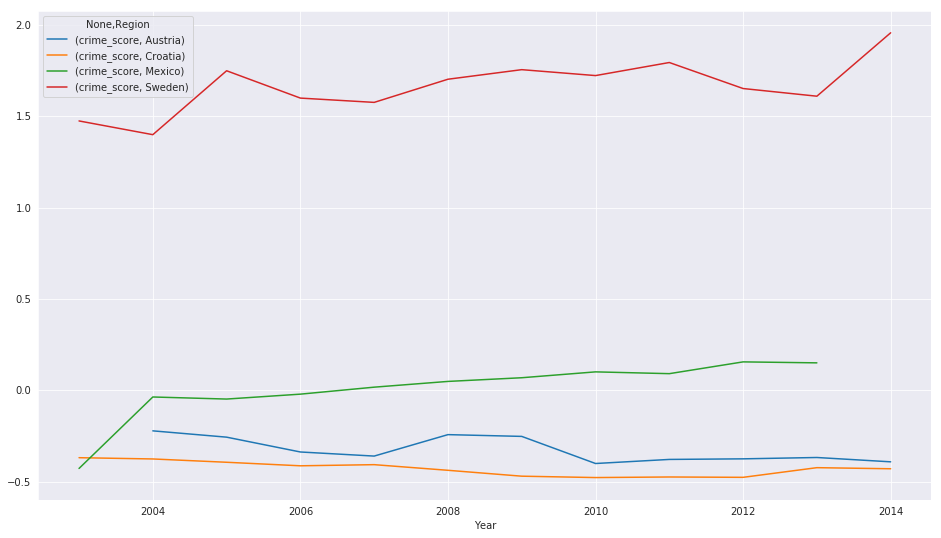

In [153]:
import matplotlib.pyplot as plt
unodc_avg_region_all.loc[plot_countries].unstack(level=0).plot(figsize=(16, 9))

In [154]:
import numpy as np
models={}
unodc_avg_region_all["crime_score_lin"]=0
crime_score_grad=pd.Series()
for c in unodc_avg_region_all.index.levels[0]:
    tmp=unodc_avg_region_all.loc[c]
    tmp=tmp[~tmp["crime_score"].isna()]
    if tmp.shape[0]<12:
        continue
    alpha=np.polyfit(
        (tmp.index-2000).tolist(), 
        tmp["crime_score"].tolist(), 
        2
    )
    for y in range(3,15):
        unodc_avg_region_all["crime_score_lin"].loc[c,2000+y]=y*y*alpha[0]+y*alpha[1]+alpha[2]
    crime_score_grad[c]=abs(alpha[0]) # taking the coefficient of x**2 as this is telling wether or not there was a change

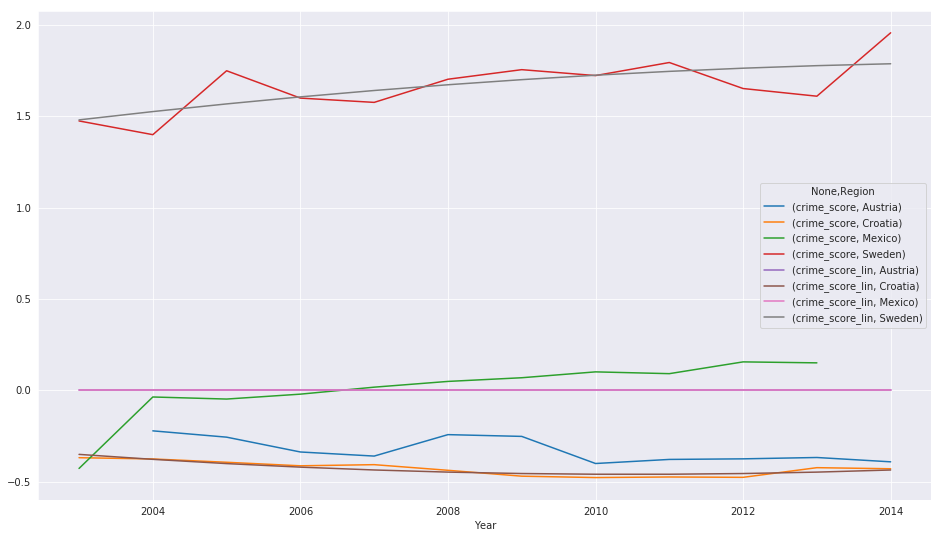

In [155]:
import matplotlib.pyplot as plt
unodc_avg_region_all.loc[plot_countries].unstack(level=0).plot(figsize=(16, 9))

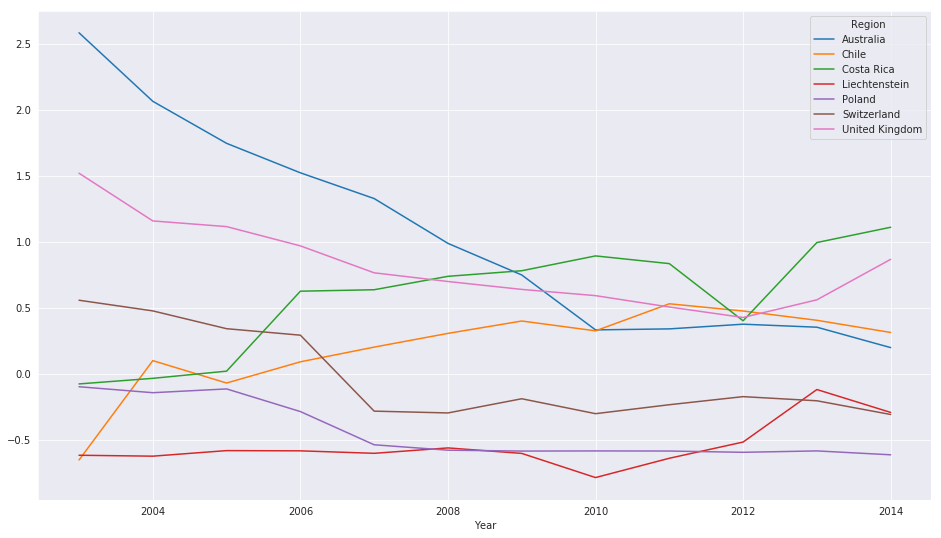

In [156]:
interesting_countries=crime_score_grad.sort_values(ascending=False).head(7).index

import matplotlib.pyplot as plt
unodc_avg_region_all["crime_score"].loc[interesting_countries].unstack(level=0).plot(figsize=(16, 9))

In [157]:
trend_plot=unodc_avg_region_all[["crime_score"]].loc[interesting_countries].copy()
trend_plot=trend_plot.merge(df_social_max,left_index=True,right_index=True,how="outer")
trend_plot=trend_plot.merge(df_econ_max,left_index=True,right_index=True,how="outer")
trend_plot-=trend_plot.mean()
trend_plot/=trend_plot.std()
trend_plot.loc["Australia"]

,crime_score,"Total population in 1,000",Population density (persons per km2),"Crude birth rate (births per 1,000)",Total fertility rate,"Enrolment in first grade of primary education (rate in percent, all genders)","Primary Education drop-out rate (in percent, all genders)",Female to male ratio students at tertiary level education,Inflation rate,Unemployment rate per capita,GDP per capita
Year,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.126338,-0.350671,0.606789
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.132428,-0.278899,0.478432
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.217677,-0.336628,0.513160
2003,3.377728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.235945,-0.405279,0.710556
2004,2.631694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.260302,-0.489532,1.119322
2005,2.174075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.235945,-0.545701,1.328284
2006,1.853231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.181142,-0.584707,1.449051
2007,1.572751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.260302,-0.647117,1.735851
2008,1.084953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.132428,-0.670520,2.242377


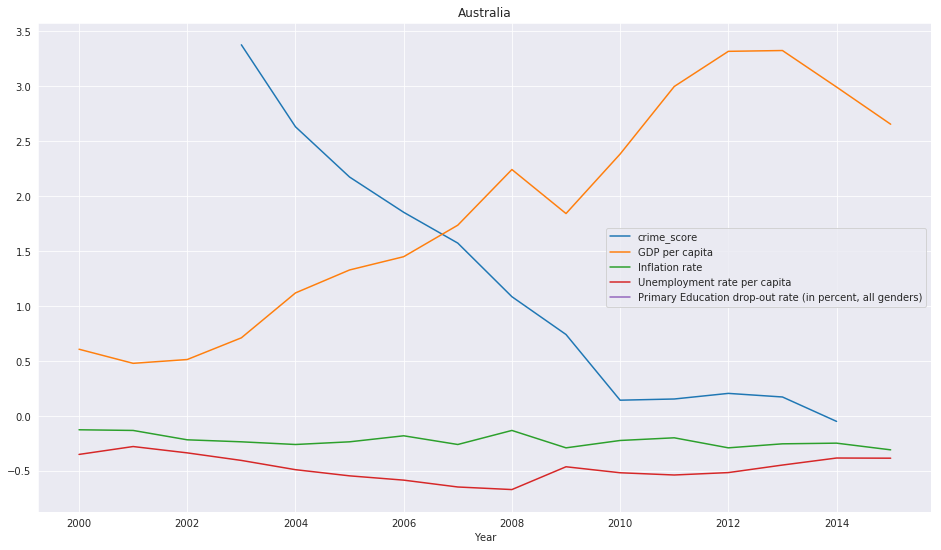

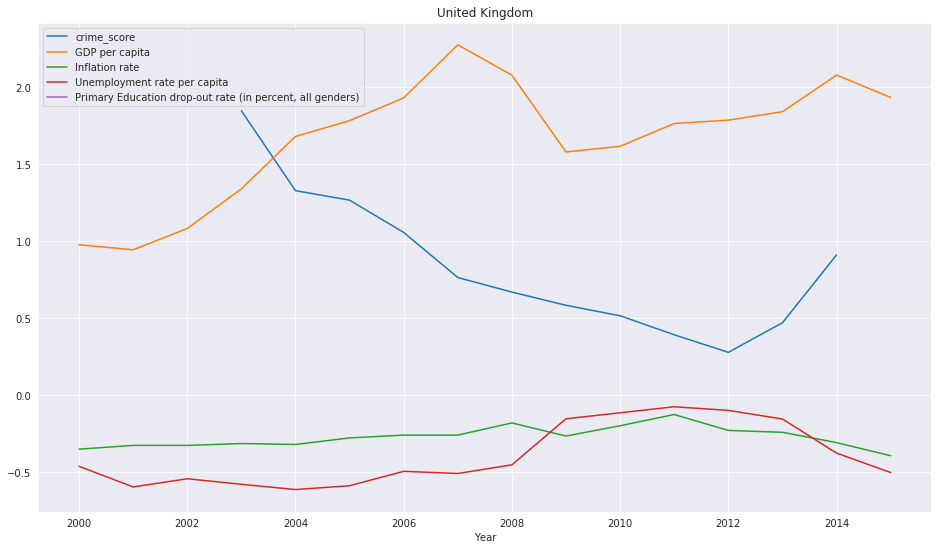

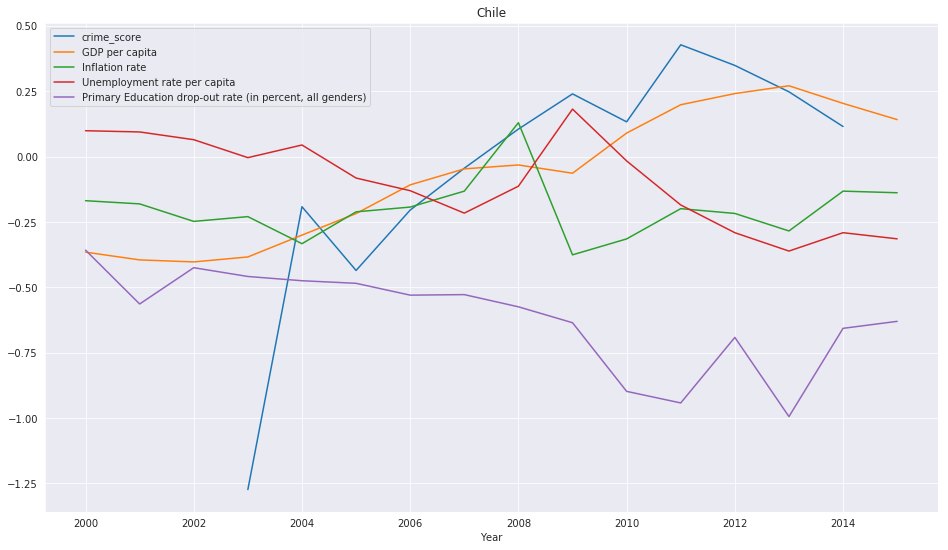

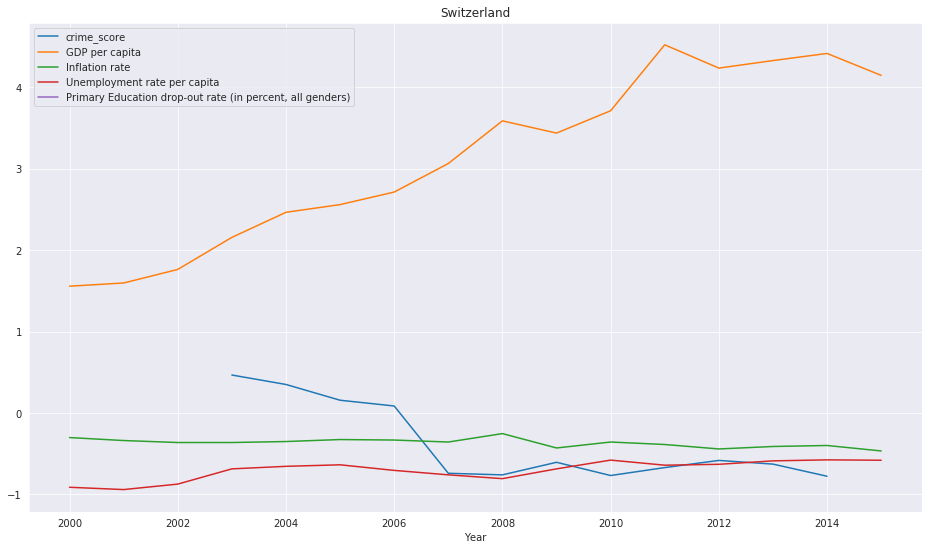

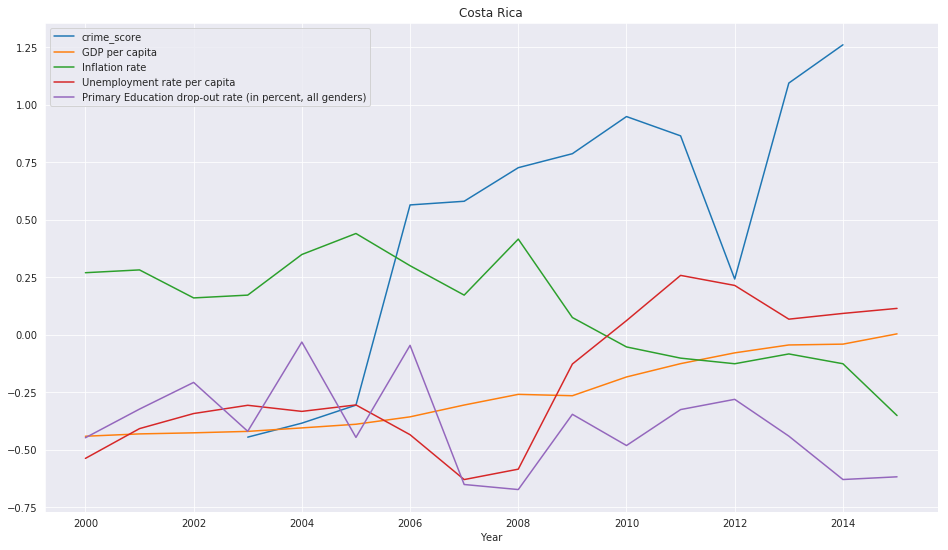

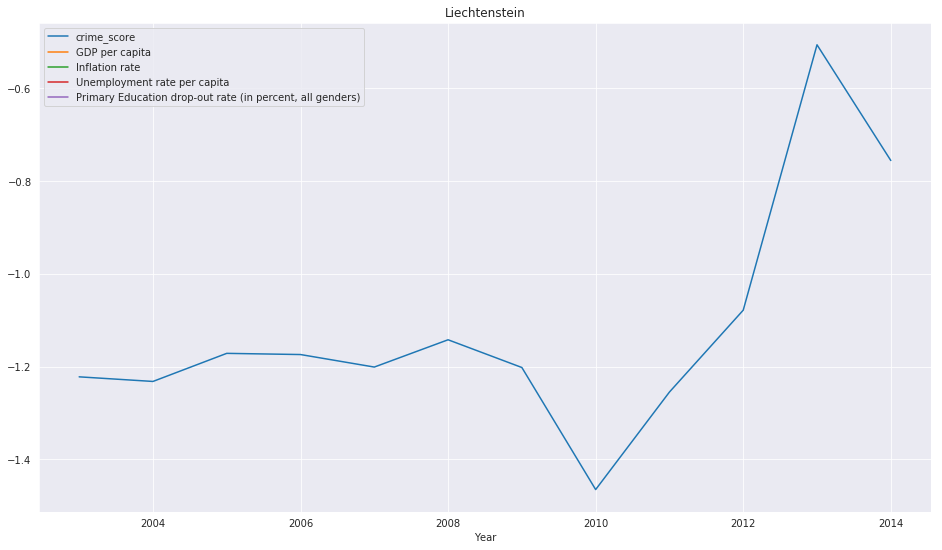

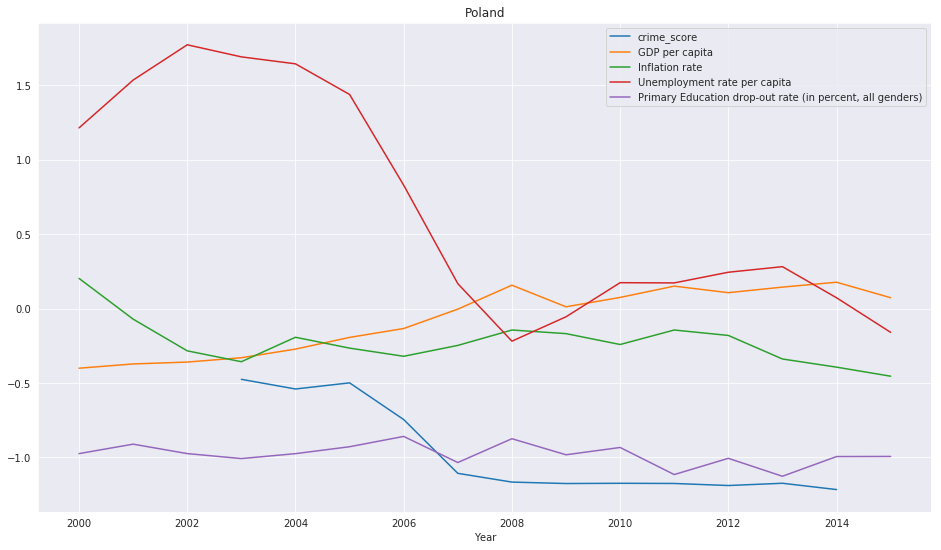

In [158]:
for c in interesting_countries:
    trend_plot[["crime_score","GDP per capita","Inflation rate","Unemployment rate per capita","Primary Education drop-out rate (in percent, all genders)"]].loc[c].plot(title=c,figsize=(16, 9))

WE have seen how crime indicators moves with other socio-economiv indicators. Let us quantify it in a corr plot.

Before we proceede we need to prepare the final dataframe a bit more. One thing I do want to note. There we a LOT! of NaN values, and MICE (ITerativeImputer) did not impute the values as expected (only on crime data since thats were we had a lot of NaN on socio and economic data it worked splendid). Interpolation (the logical choice) was out of the question since we did not have data points on both ends, i.e. there were missing from the gekko or entirely from the end. So we needed to compromise regarding interpolation, polynomial where possible and bfil, ffil otherwise.

To create a target variable we will use the normalised aggregated crime rates from before:

In [159]:
crime_normalised=unodc_avg_region_all["crime_score"].reset_index()

In [160]:
df_all_red["total_crime"]=crime_normalised["crime_score"]

In [161]:
df_all_red.interpolate(method='linear',inplace=True)

In [162]:
df_all_red.fillna(method="bfill",inplace=True)

In [163]:
df_all_red.fillna(method="ffill",inplace=True)

In [164]:
df_all_red.head()

,Region,Year,"Assault rate per 100,000 population","Kidnapping rate per 100,000 population","Theft rate per 100,000 population","Robbery rate per 100,000 population","Burglary rate per 100,000 population","Domestic Burglary rate per 100,000 population","Theft of Private Cars rate per 100,000 population","Motor Vehicle Theft rate per 100,000 population",...,Unemployment rate per capita,GDP per capita,"Total population in 1,000",Population density (persons per km2),"Crude birth rate (births per 1,000)",Total fertility rate,"Enrolment in first grade of primary education (rate in percent, all genders)","Primary Education drop-out rate (in percent, all genders)",Female to male ratio students at tertiary level education,total_crime
0,Albania,2003,5.4,0.4,96.9,6.5,6.5,21.9,23.0,23.0,...,0.2015,1890.68,3111.0,113.5,2.90,1.946,2.009965,10.071020,1.56,-0.553303
1,Albania,2004,5.4,0.4,96.9,6.5,6.5,21.9,23.0,23.0,...,0.1882,2416.59,3098.0,113.1,2.90,1.946,1.886217,7.813626,1.53,-0.553303
2,Albania,2005,5.4,0.4,96.9,6.5,6.5,21.9,23.0,23.0,...,0.1746,2709.14,3079.0,112.4,2.38,1.640,1.832900,7.851469,1.42,-0.553303
3,Albania,2006,8.1,0.4,95.7,5.4,5.4,20.2,17.4,17.4,...,0.1604,3005.01,3054.0,111.5,2.38,1.640,1.707924,6.066320,1.32,-0.553303
4,Albania,2007,7.3,0.4,99.0,4.1,4.1,25.2,14.5,14.5,...,0.1350,3603.01,3024.0,110.4,2.38,1.640,1.683168,6.562520,1.35,-0.553303


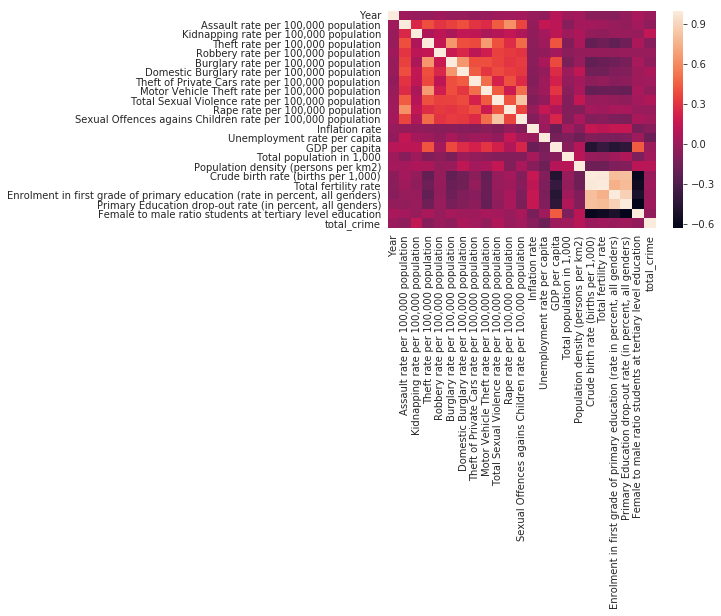

In [165]:

df_all_red.drop(['Region'],axis=1,inplace=True)

# calculate the correlation matrix
corr = df_all_red.corr()

# plot the heatmap
sns_plot2=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


(interesting and some) Conclusions from the correlation matrix: 

*  WE can see some correlation between crimes and inflation rate & GDP rate
*  Between crimes we can see (and confirm) that assault rate is correted with rape rate 
*  And socio-economic that GDP is correlated to Female to male student ratio

To answer the last question we are going to build a model and try to predict all of the crimes combined using other (socio-economic) factors

<a id="7"></a> <br>
# Question 5: Are there also country characteristics that predict trends in crime rates or types of crimes? 

We have joined all of the sets. Aggregated all of the crimes  into one column and now will use other variables to predict it (regression problem). If we were to use light gradient boosting method (lgbm) than there is also an option to use showcase important features, i.e. feature that had the most predictive characteristics. When we have such information than typical characteristics of countries with high/low crime rates are those features that had the most importance when predicting.

In [166]:
df_all.head()

,Region,Year,"Assault rate per 100,000 population","Kidnapping rate per 100,000 population","Theft rate per 100,000 population","Robbery rate per 100,000 population","Burglary rate per 100,000 population","Domestic Burglary rate per 100,000 population","Theft of Private Cars rate per 100,000 population","Motor Vehicle Theft rate per 100,000 population",...,Inflation rate,Unemployment rate per capita,GDP per capita,"Total population in 1,000",Population density (persons per km2),"Crude birth rate (births per 1,000)",Total fertility rate,"Enrolment in first grade of primary education (rate in percent, all genders)","Primary Education drop-out rate (in percent, all genders)",Female to male ratio students at tertiary level education
1800,Albania,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001,0.2273,1175.79,3122.0,113.9,2.9,1.946,2.236675,10.388620,1.43
1801,Albania,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031,0.2268,1326.97,3122.0,114.0,2.9,1.946,2.202018,10.867283,1.49
1802,Albania,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.078,0.2149,1453.64,3119.0,113.8,2.9,1.946,1.539505,4.713389,1.54
0,Albania,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005,0.2015,1890.68,3111.0,113.5,2.9,1.946,2.009965,10.071020,1.56
1,Albania,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.023,0.1882,2416.59,3098.0,113.1,2.9,1.946,1.886217,7.813626,1.53


In [167]:
y_pred=df_all_red["total_crime"]

In [168]:
df_all_red.drop(['total_crime'], axis=1, inplace=True)

In [169]:
X_train=df_all_red.loc[df_all_red['Year'] < 2013,:]

In [170]:
X_test1=df_all_red.loc[df_all_red['Year'] > 2012,:]

In [171]:
X_test1.head()

,Year,"Assault rate per 100,000 population","Kidnapping rate per 100,000 population","Theft rate per 100,000 population","Robbery rate per 100,000 population","Burglary rate per 100,000 population","Domestic Burglary rate per 100,000 population","Theft of Private Cars rate per 100,000 population","Motor Vehicle Theft rate per 100,000 population","Total Sexual Violence rate per 100,000 population",...,Inflation rate,Unemployment rate per capita,GDP per capita,"Total population in 1,000",Population density (persons per km2),"Crude birth rate (births per 1,000)",Total fertility rate,"Enrolment in first grade of primary education (rate in percent, all genders)","Primary Education drop-out rate (in percent, all genders)",Female to male ratio students at tertiary level education
10,2013,5.700000,0.200000,182.300000,12.900000,12.700000,44.300000,19.80,19.800000,3.000000,...,0.019,0.1564,4413.08,2919.0,106.5,2.40,1.714,1.324803,1.287470,1.460000
22,2013,142.600000,0.600000,143.000000,46.500000,35.900000,8.600000,1.90,11.000000,14.700000,...,0.033,0.0982,5471.12,38339.0,16.1,5.06,2.960,1.967081,6.587000,1.510000
34,2013,239.576000,0.662857,421.388000,425.428000,44.668571,13.471429,2.56,65.252000,19.466667,...,0.088,0.0733,4804.63,25998.0,20.9,8.74,5.950,4.072089,39.678988,0.780000
46,2013,336.552000,0.725714,699.776000,804.356000,53.437143,18.342857,3.22,119.504000,24.233333,...,0.011,0.0840,12194.61,98.0,222.3,3.36,2.096,1.912603,8.948656,1.303121
58,2013,107.271429,0.788571,194.966667,163.483333,62.205714,23.214286,3.88,29.016667,8.657143,...,0.106,0.0710,12976.64,42540.0,15.5,3.56,2.345,1.785172,6.984464,1.610000


In [172]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

In [173]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=11)

In [174]:
def train_model(X=X_train, X_test=X_test1, y=y_pred, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(len(X))
    prediction = np.zeros(len(X_test))
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 50000, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='mae',verbose=10000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X_tr.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X_tr.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X_tr.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X_tr.columns), ntree_limit=model.best_ntree_limit)
            
        if model_type == 'rcv':
            model = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0, 1000.0), scoring='neg_mean_absolute_error', cv=5)
            model.fit(X_train, y_train)
            print(model.alpha_)

            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_absolute_error(y_valid, y_pred_valid)
            print(f'Fold {fold_n}. MAE: {score:.4f}.')
            print('')
            
            y_pred = model.predict(X_test).reshape(-1,)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_absolute_error(y_valid, y_pred_valid)
            print(f'Fold {fold_n}. MAE: {score:.4f}.')
            print('')
            
            y_pred = model.predict(X_test).reshape(-1,)
        
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='MAE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_absolute_error(y_valid, y_pred_valid))

        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

Fold 0 started at Wed Mar 20 09:10:07 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[536]	training's l1: 0.249654	valid_1's l1: 0.294163
Fold 1 started at Wed Mar 20 09:10:07 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[468]	training's l1: 0.255003	valid_1's l1: 0.262855
Fold 2 started at Wed Mar 20 09:10:08 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[616]	training's l1: 0.250657	valid_1's l1: 0.269623
Fold 3 started at Wed Mar 20 09:10:08 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[507]	training's l1: 0.251173	valid_1's l1: 0.283785
Fold 4 started at Wed Mar 20 09:10:08 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[368]	training's l1: 0.261147	valid_1's l1: 0.272535
CV mean score: 0.2766, std: 0.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



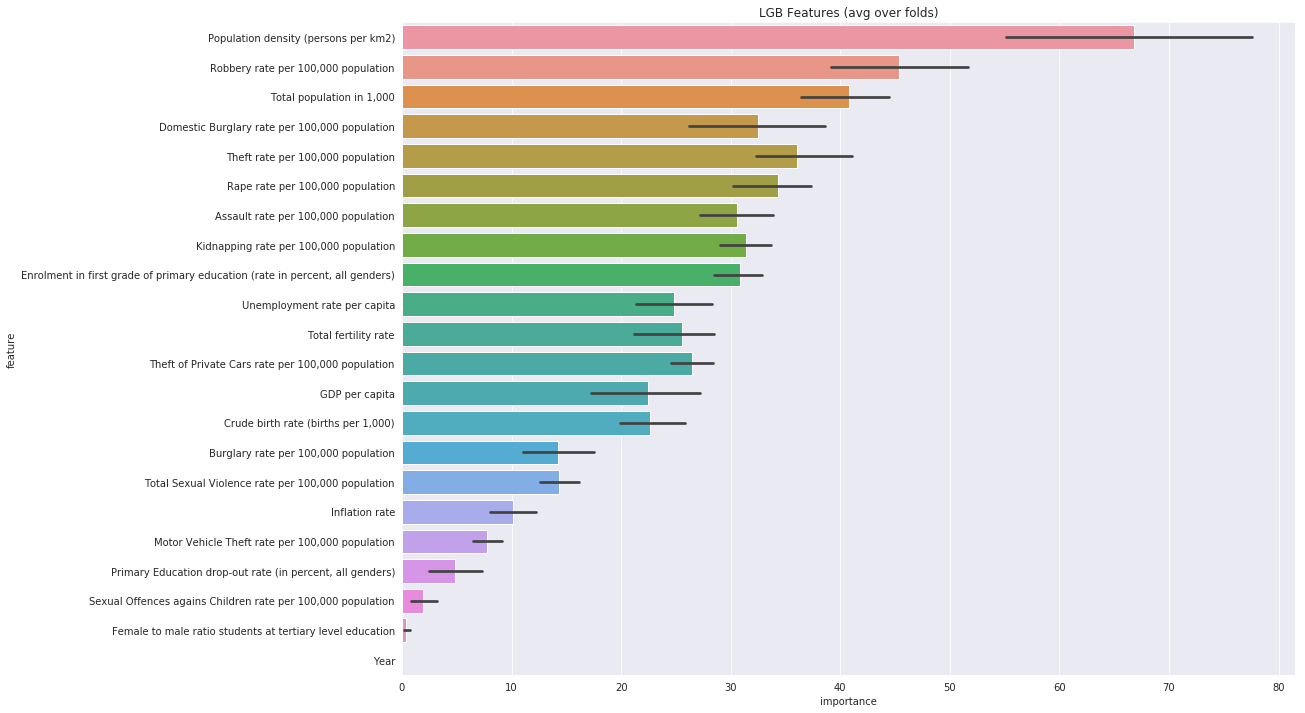

In [175]:
lgb_params = {'num_leaves': 80,
              'min_child_weight': 28,
              'min_split_gain': 0.745,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': 25,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 4,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1058,
          'reg_lambda': 0.2209,
          'feature_fraction': 0.9201
         }
oof_lgb, prediction_lgb, feature_importance = train_model(params=lgb_params, model_type='lgb', plot_feature_importance=True)

Usually I extend this code and apply the Bayesian Hyperparameter optimisation but in this case we are not that interested in having the best of the best predictions and it would take away from memory and run-time and not help that much with the predictions, so I ommited it and used parameters from another project (they are all anyways in a standard intervall for a regression).

Interpretation: We need to neglect the cirminal variables (since I did not filter them out) and just look at the socio-economic. We can see that population, fertility, Unemployment and education are deal breakers!